In [1]:
from PIL import Image
import numpy as np

def maximum_intensity_projection(image_paths):
    # Initialize variables to hold max intensity values and image dimensions
    max_intensity = None
    width, height = None, None

    # Iterate through each image path to compute the max intensity projection
    for image_path in image_paths:
        # Open image and convert to grayscale (assuming it's not already)
        img = Image.open(image_path).convert('L')
        img_array = np.array(img)

        # Get image dimensions from the first image
        if width is None and height is None:
            width, height = img.size
            max_intensity = np.zeros((height, width), dtype=np.uint8)

        # Update max intensity values
        max_intensity = np.maximum(max_intensity, img_array)

    # Convert the max intensity array back to an image
    max_intensity_img = Image.fromarray(max_intensity, 'L')
    
    return max_intensity_img

In [2]:
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams['axes.grid'] = False
plt.style.use('dark_background')
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["font.size"] = 15

In [3]:
import cv2
import os

def extract_frames(video_path, output_dir):
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Get the total frame count
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Loop through frames and save each one as a JPEG file
    frame_count = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        frame_filename = os.path.join(output_dir, f"frame_{frame_count:04d}.jpg")
        cv2.imwrite(frame_filename, frame)

        frame_count += 1

    # Release the video capture object
    cap.release()

    print(f"{frame_count} frames extracted and saved in {output_dir}.")


253 frames extracted and saved in ./data/15092023/MVI_7480a.
889 frames extracted and saved in ./data/15092023/MVI_7480b.
639 frames extracted and saved in ./data/15092023/MVI_7481c.
428 frames extracted and saved in ./data/15092023/MVI_7481b.
496 frames extracted and saved in ./data/15092023/MVI_7481a.


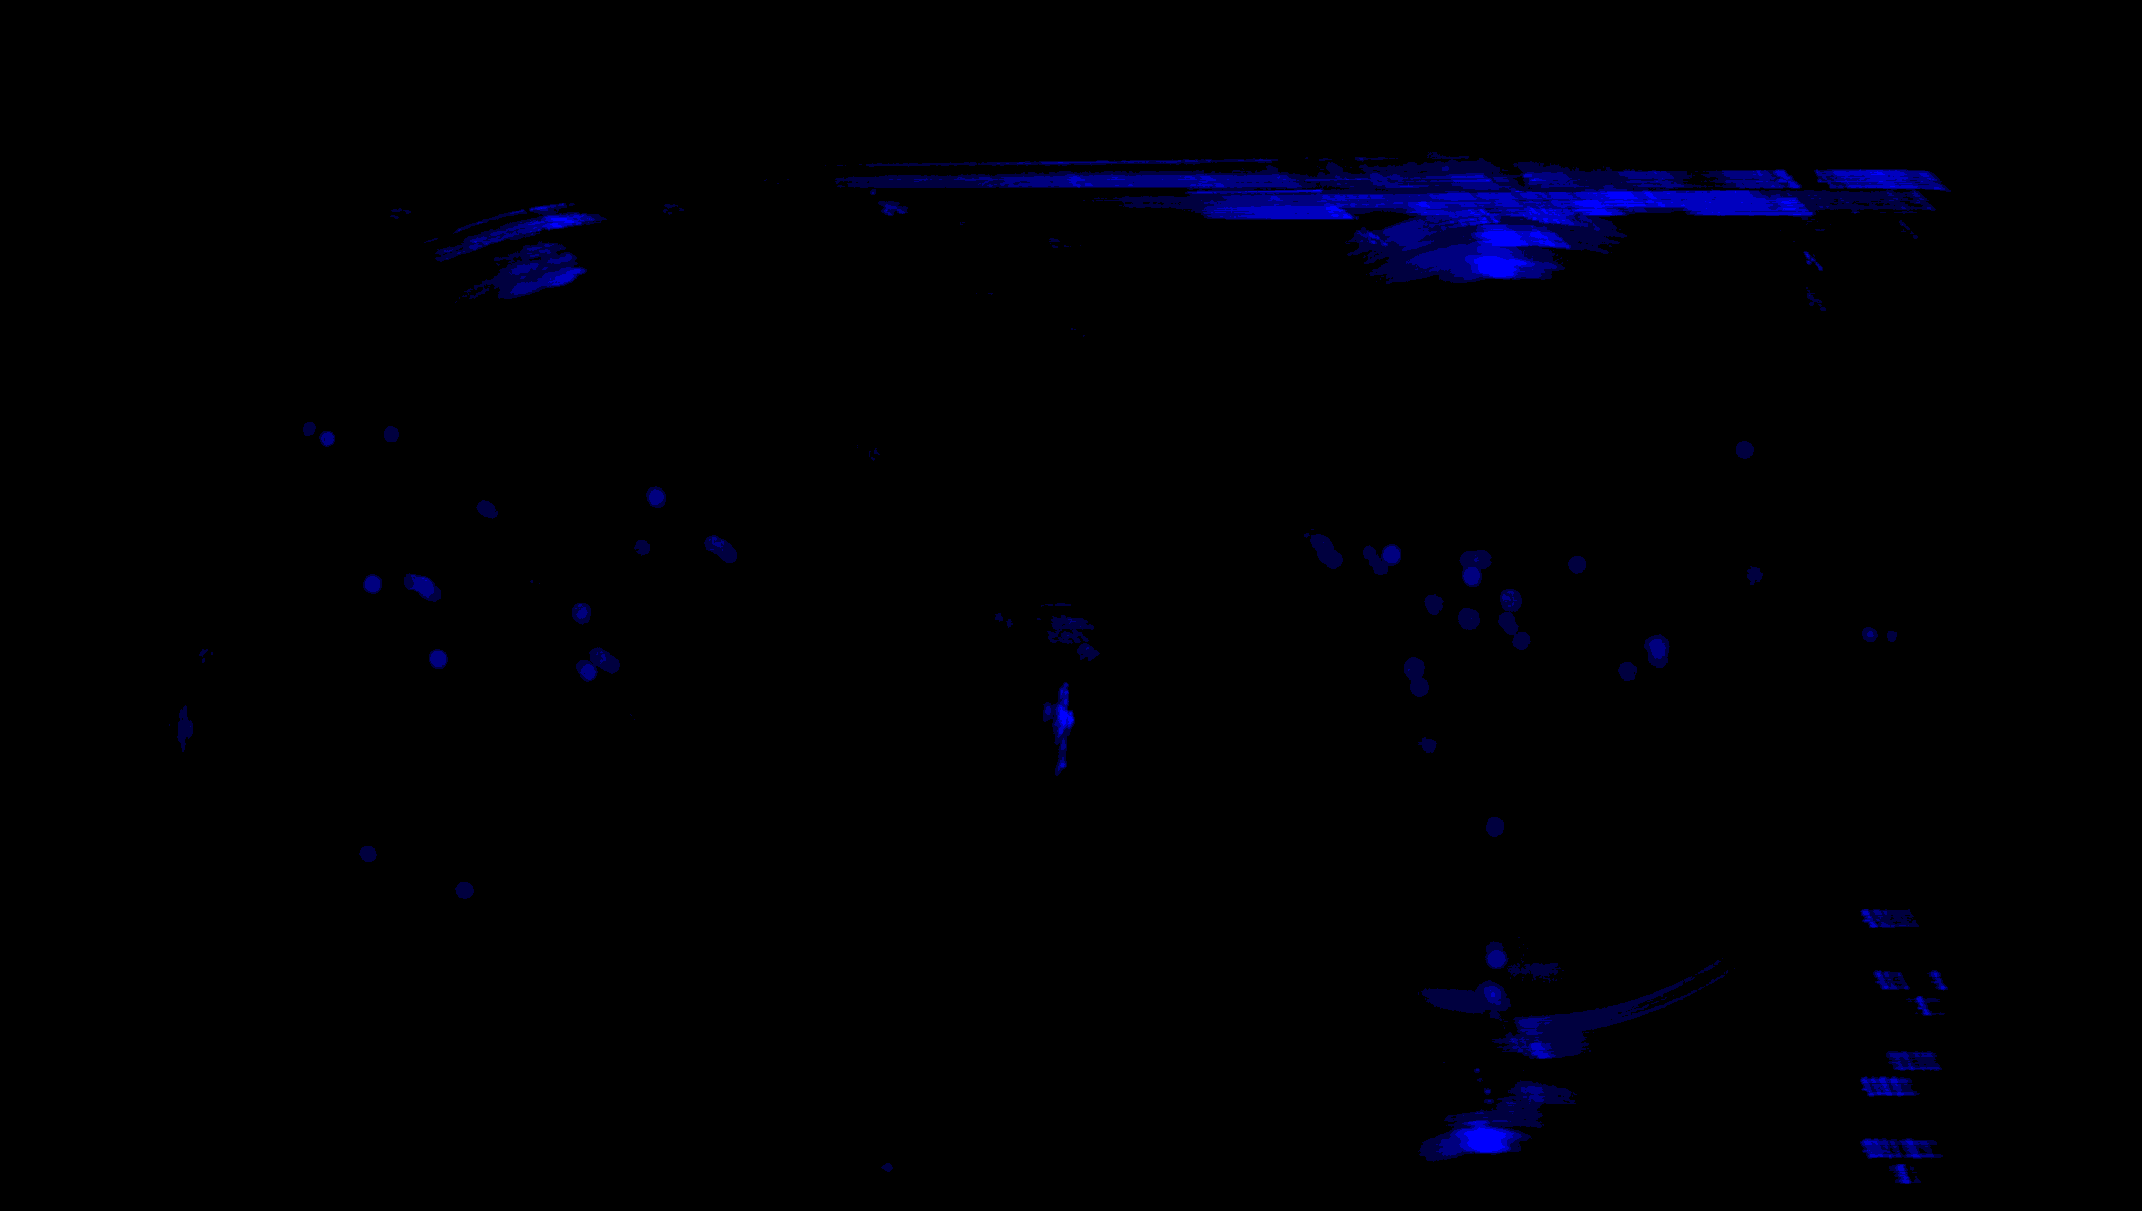

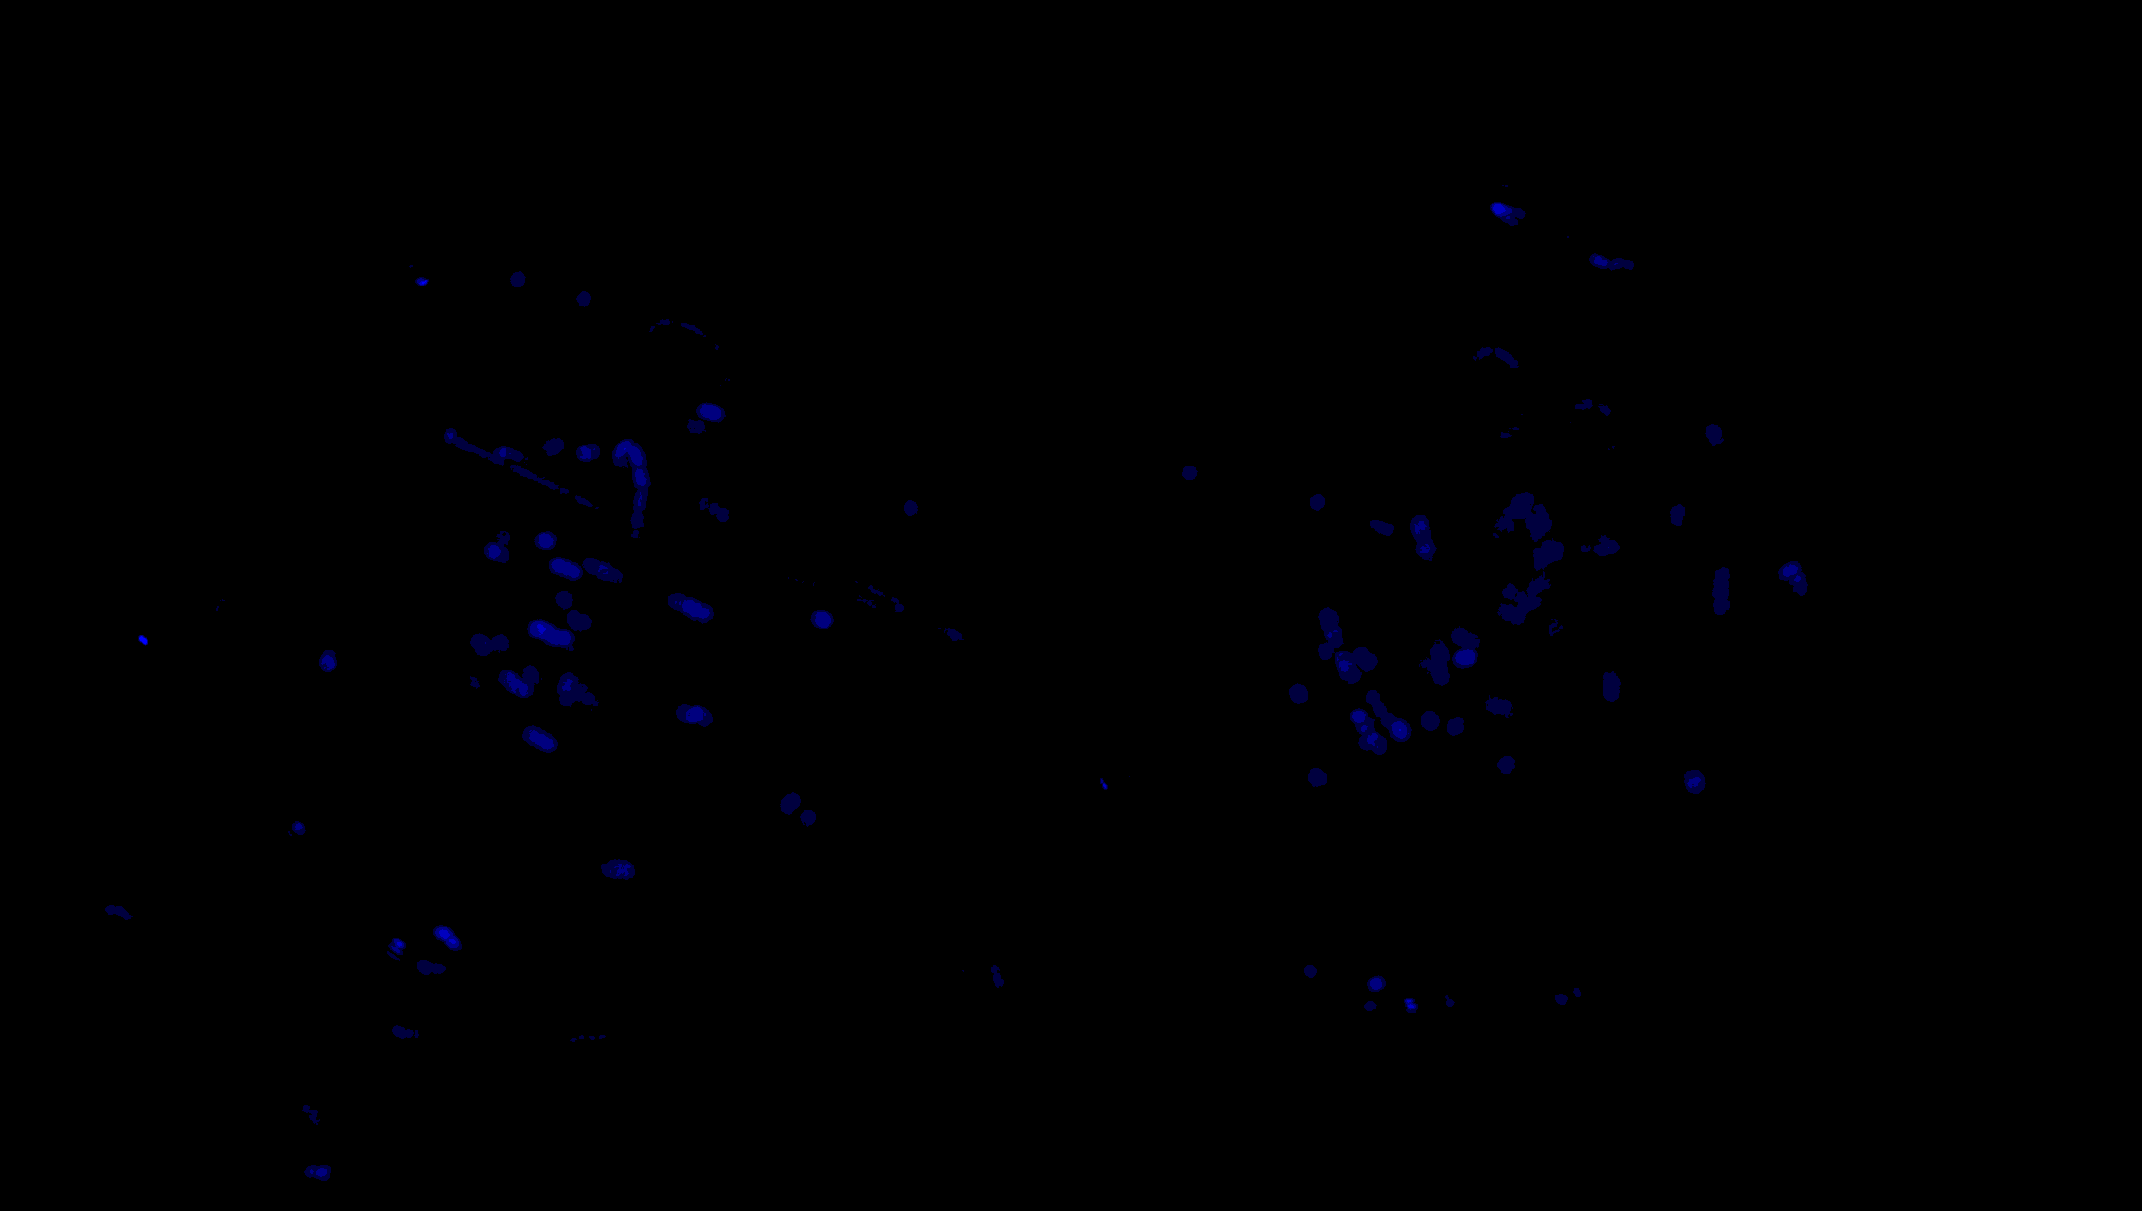

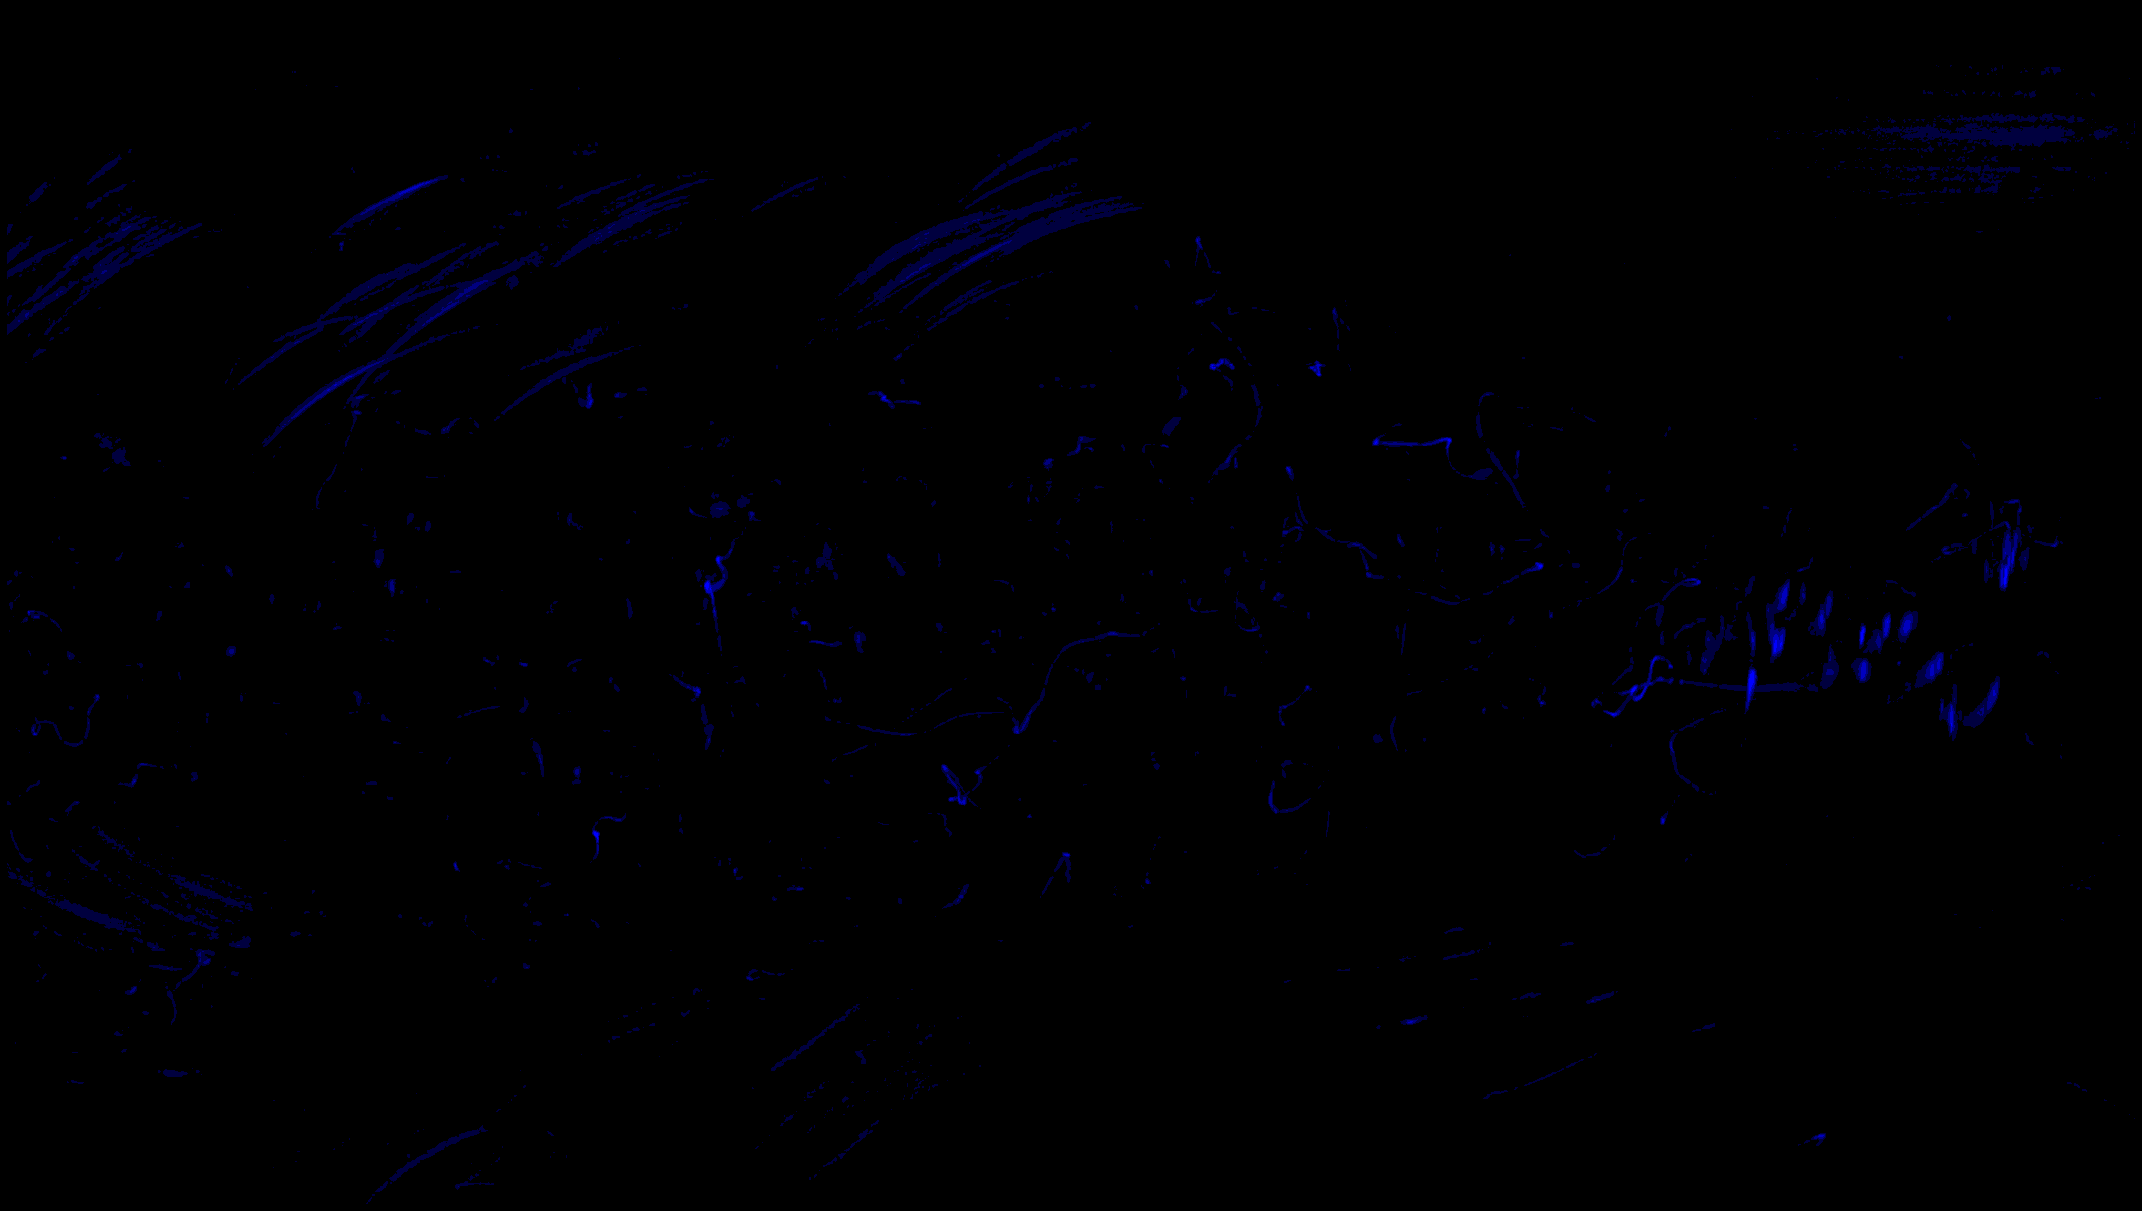

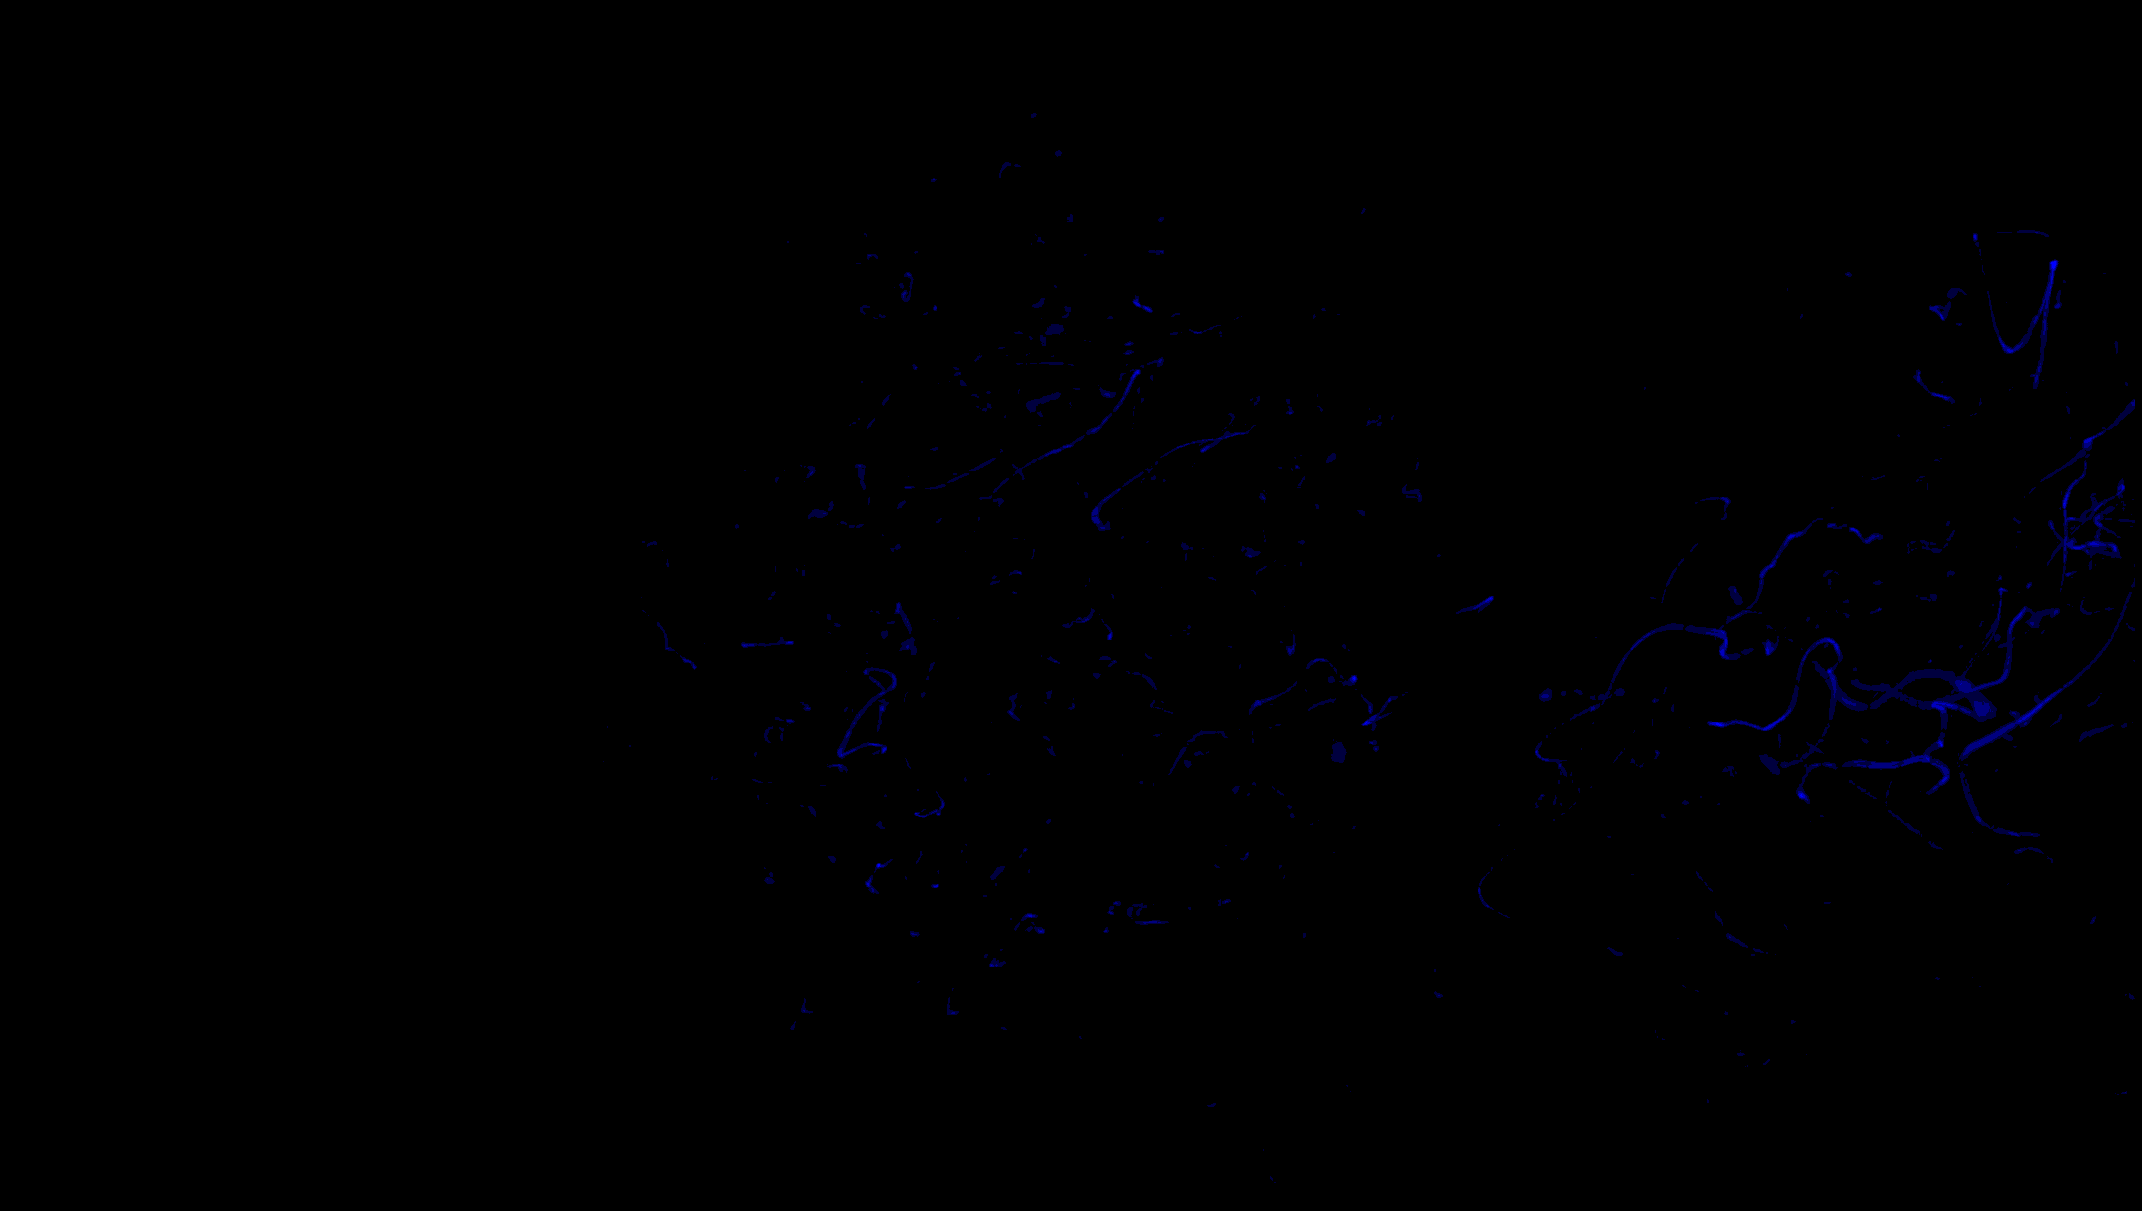

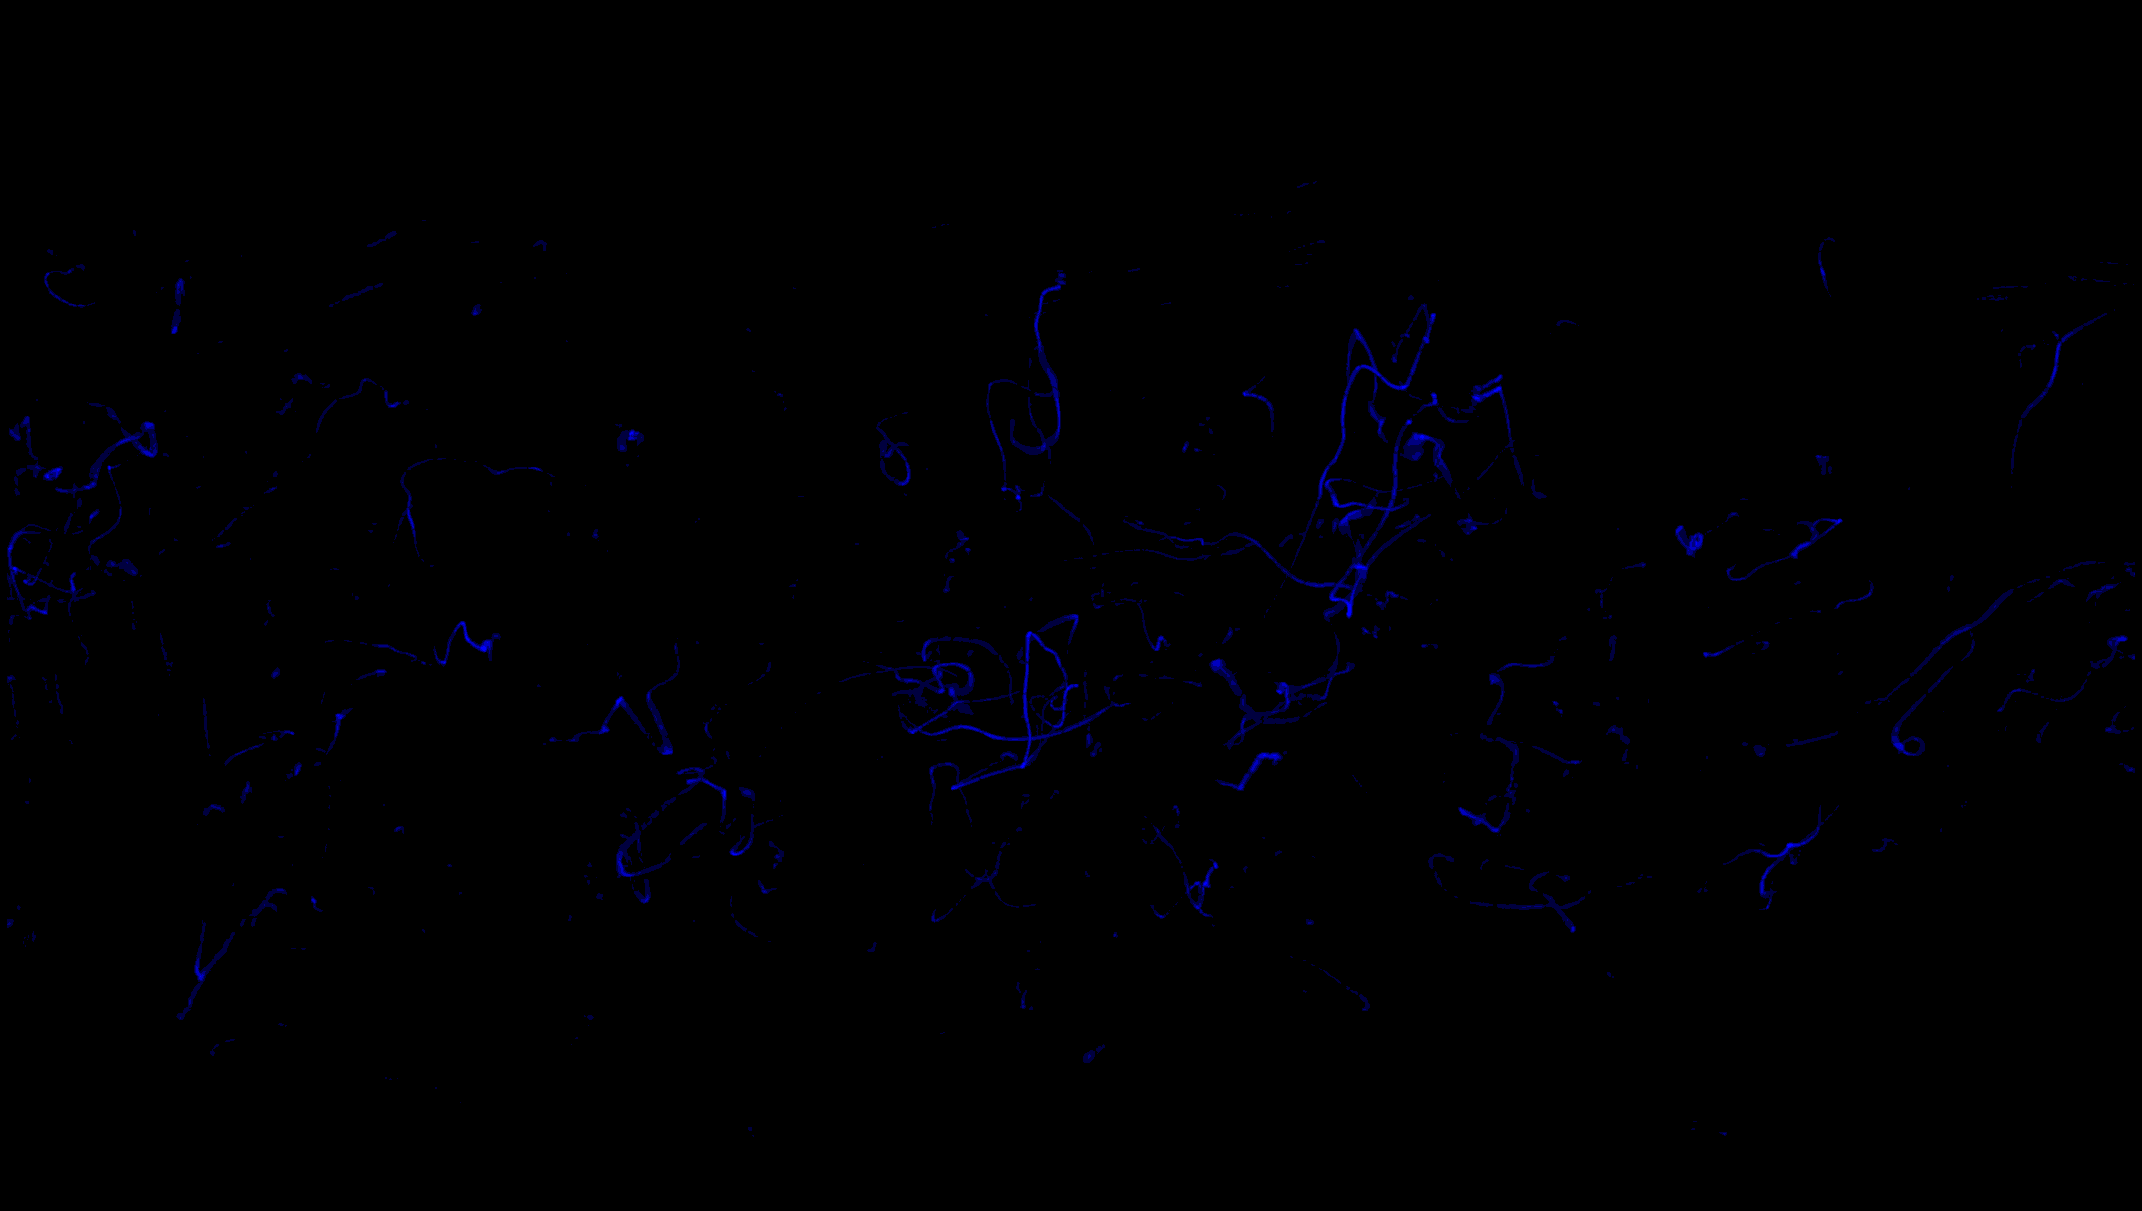

In [5]:
vid_dir = "./data/15092023/"
vid_filenames = [f.split(".mp4")[0] for f in os.listdir(vid_dir) if f.endswith(".mp4")]

colors = [(0, 0, 0), (0, 0, 1)]
cm = LinearSegmentedColormap.from_list("Custom", colors, N=5)

frame_extraction = True
if frame_extraction:
    for vid_file in vid_filenames:

        # Frame EXTRACTION
        video_path = os.path.join(vid_dir, vid_file + ".mp4")
        output_dir = os.path.join(vid_dir, vid_file)
        extract_frames(video_path, output_dir)

        # MAX PROJ
        filenames = [fn for fn in os.listdir(output_dir) if fn.endswith(".jpg")]
        filepaths = [os.path.join(output_dir, fp) for fp in filenames]
        result_img = maximum_intensity_projection(filepaths)

        plt.figure(figsize=(30,18))
        plt.imshow(result_img, cmap=cm)
        plt.axis("off")
        plt.tight_layout()
        plt.savefig(f"./max-int-proj-frames-all_{vid_file}.jpg", dpi=600)

950 frames extracted and saved in ./data/14092023/MVI_7474a.
63 frames extracted and saved in ./data/14092023/MVI_7473a.
367 frames extracted and saved in ./data/14092023/MVI_7473b.
832 frames extracted and saved in ./data/14092023/MVI_7473c.
163 frames extracted and saved in ./data/14092023/MVI_7473f.
1054 frames extracted and saved in ./data/14092023/MVI_7473d.
287 frames extracted and saved in ./data/14092023/MVI_7472a.
1133 frames extracted and saved in ./data/14092023/MVI_7473e.
347 frames extracted and saved in ./data/14092023/MVI_7471a.


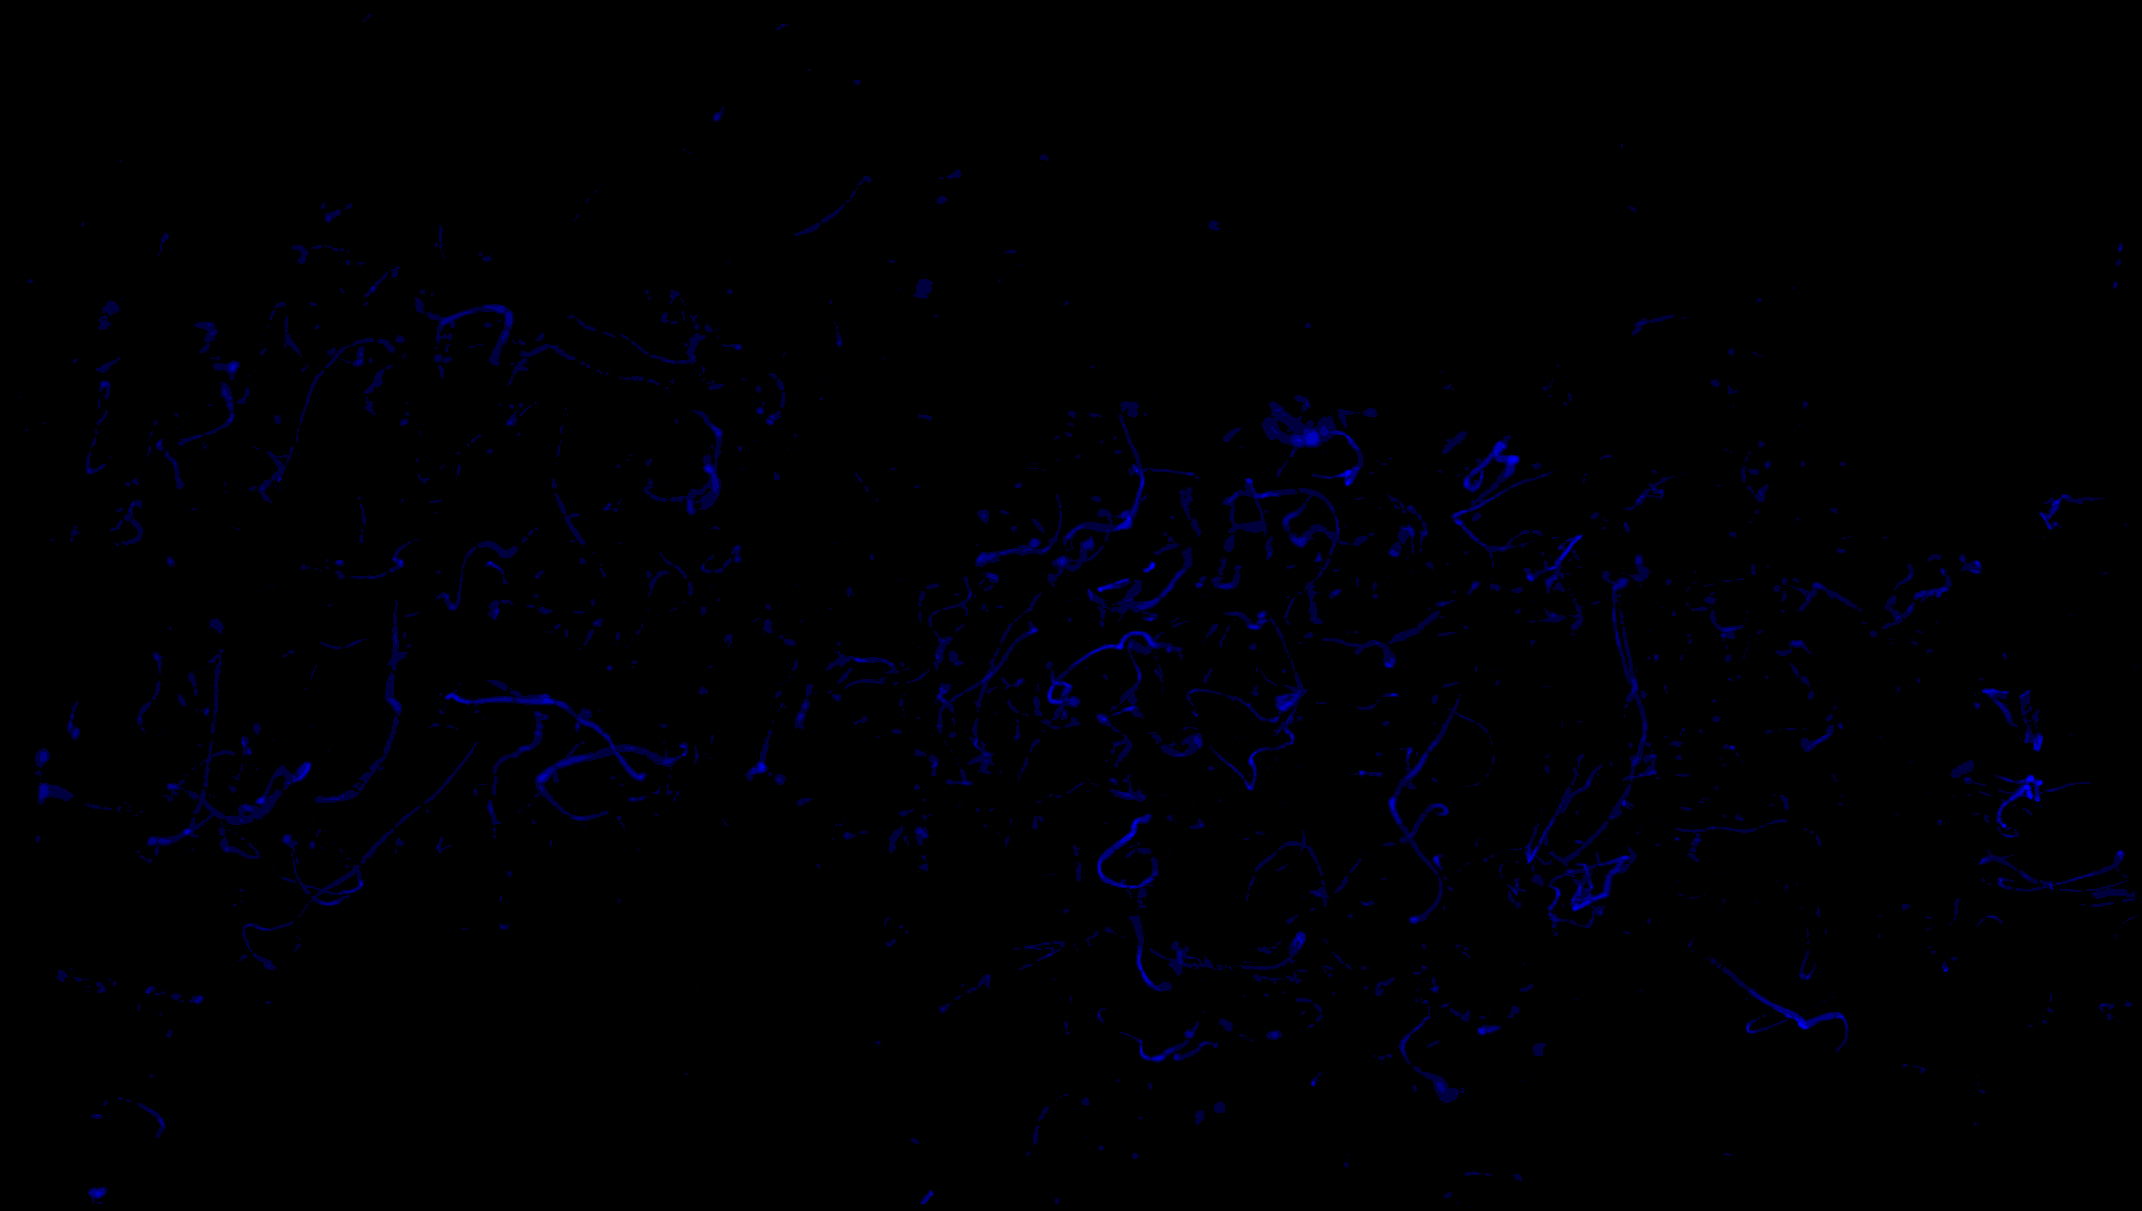

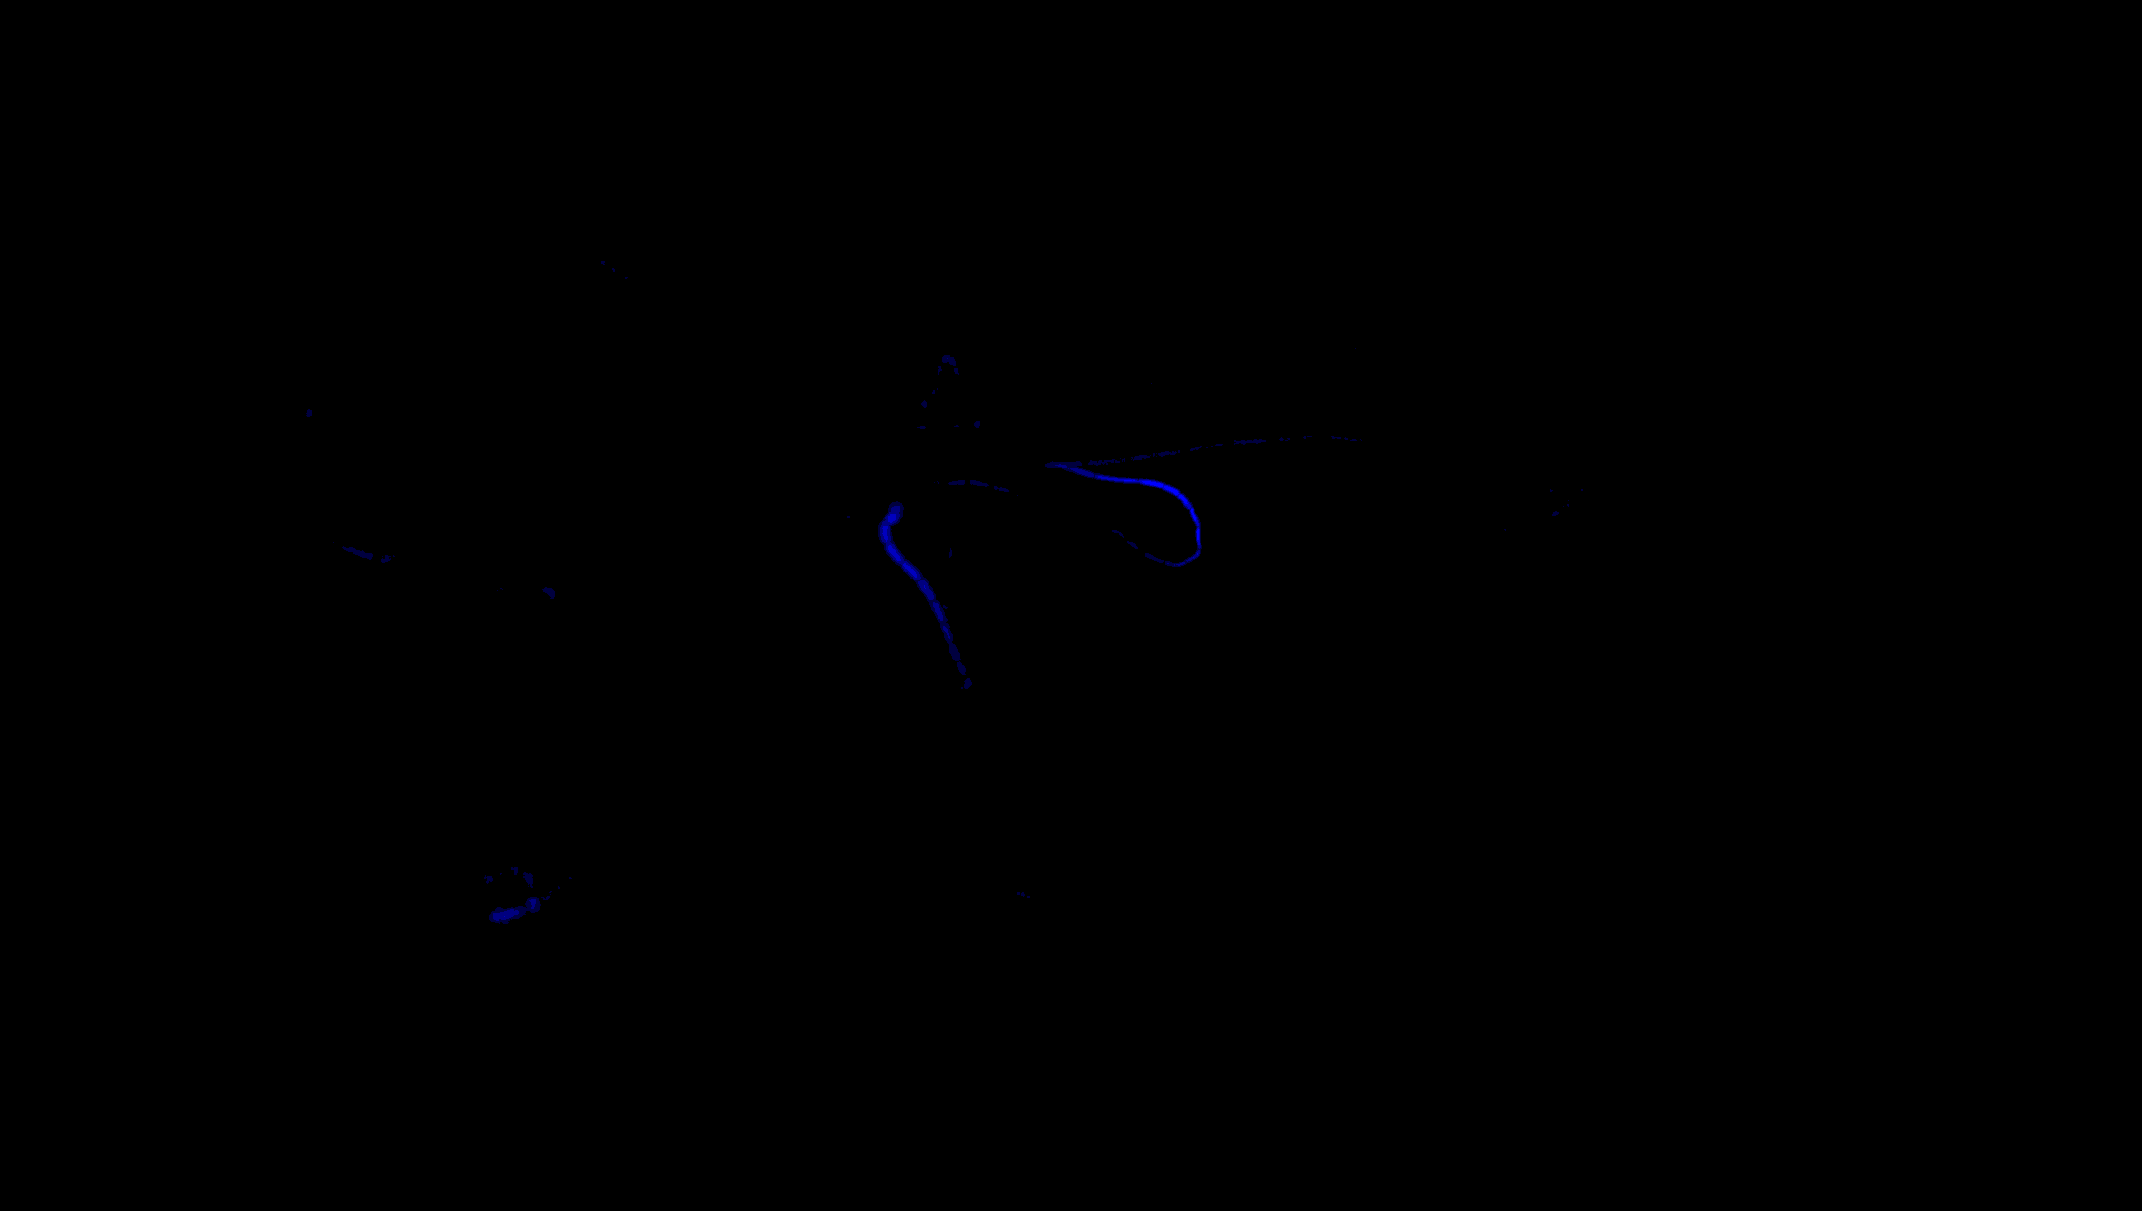

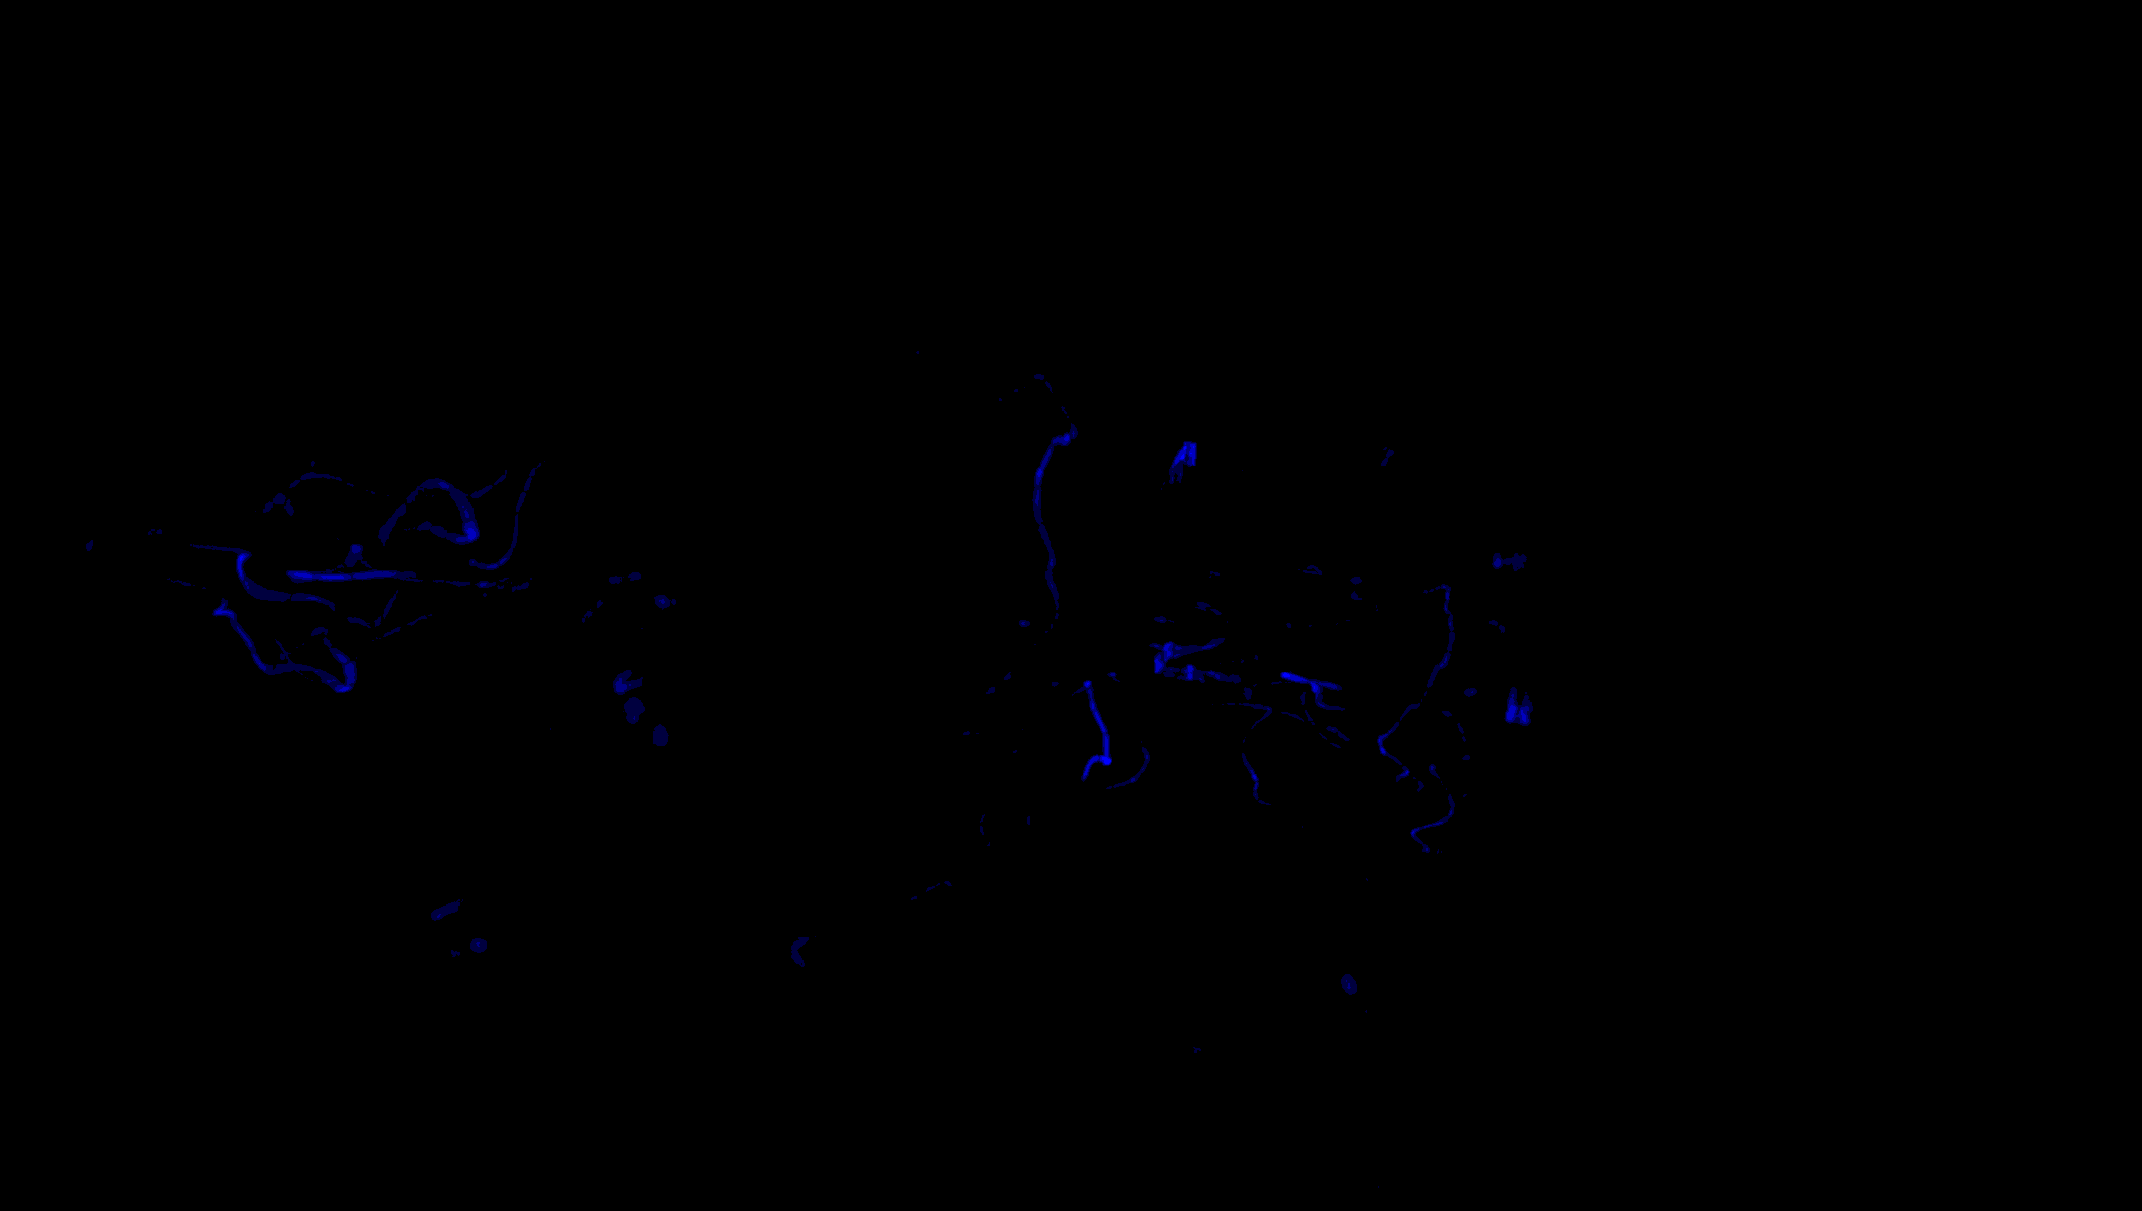

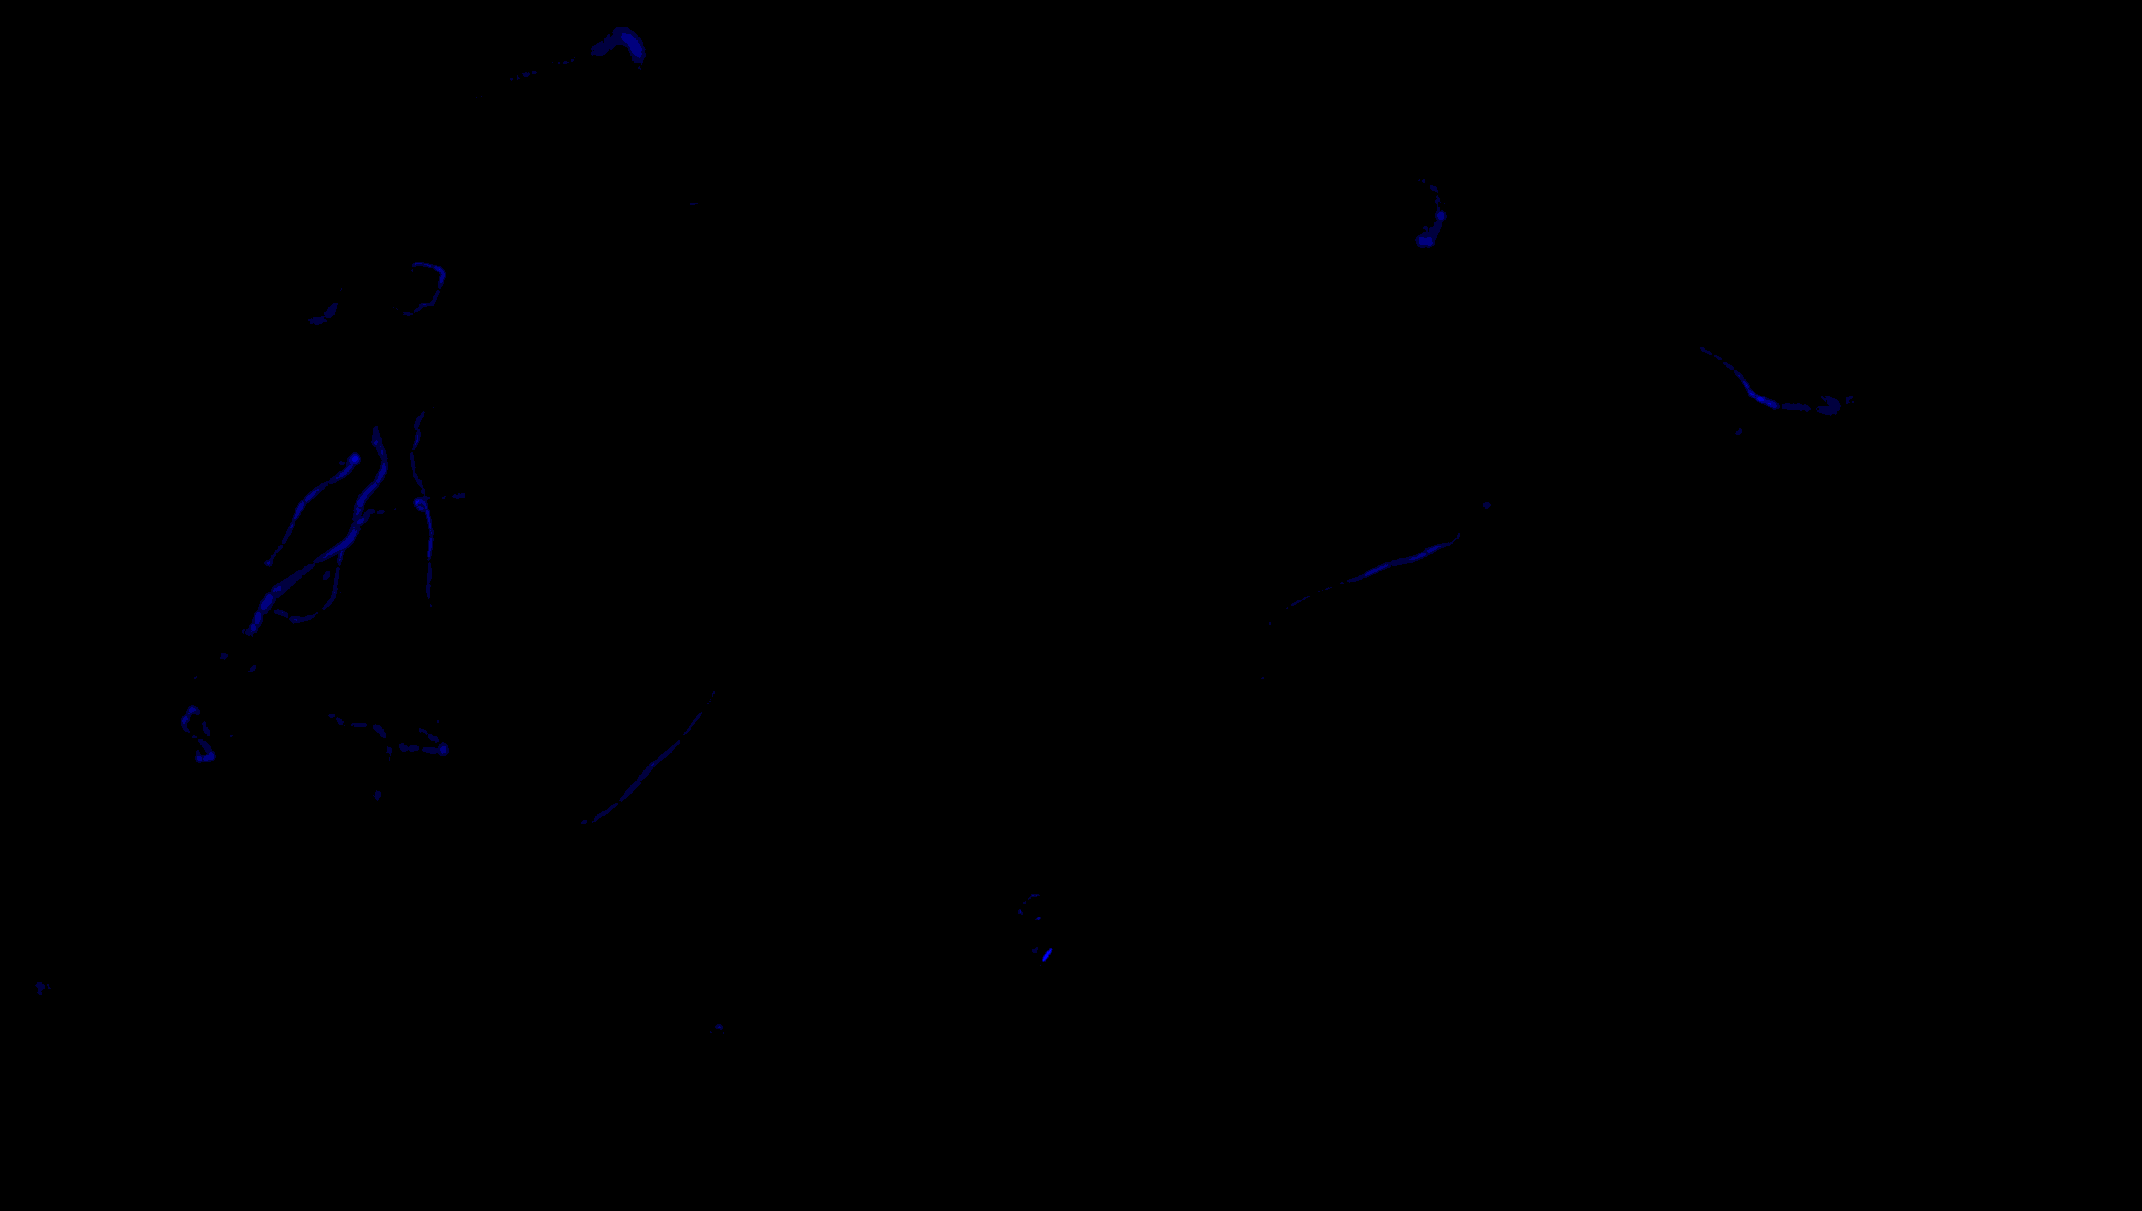

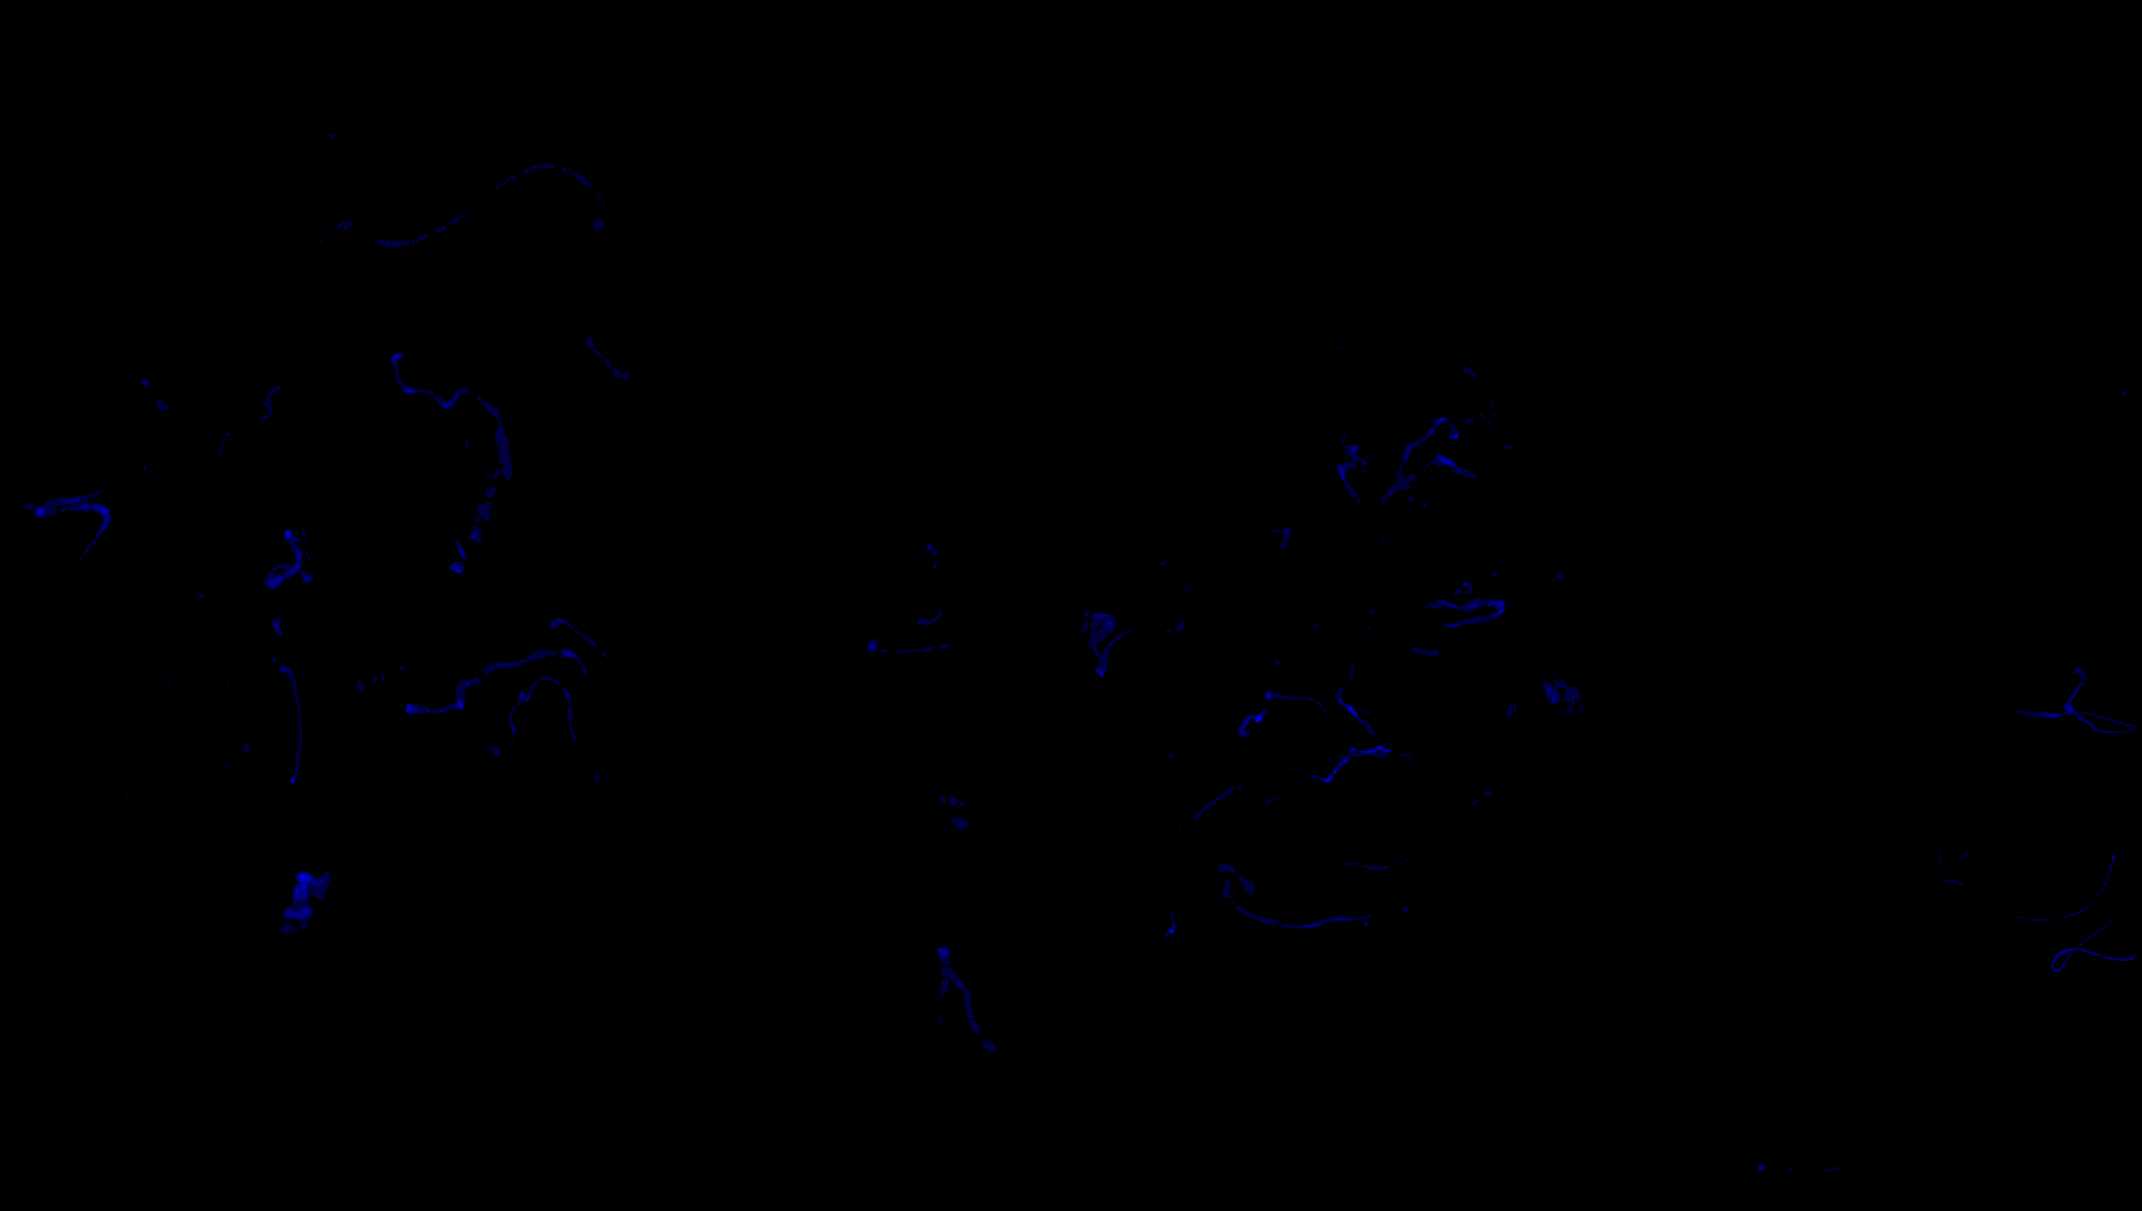

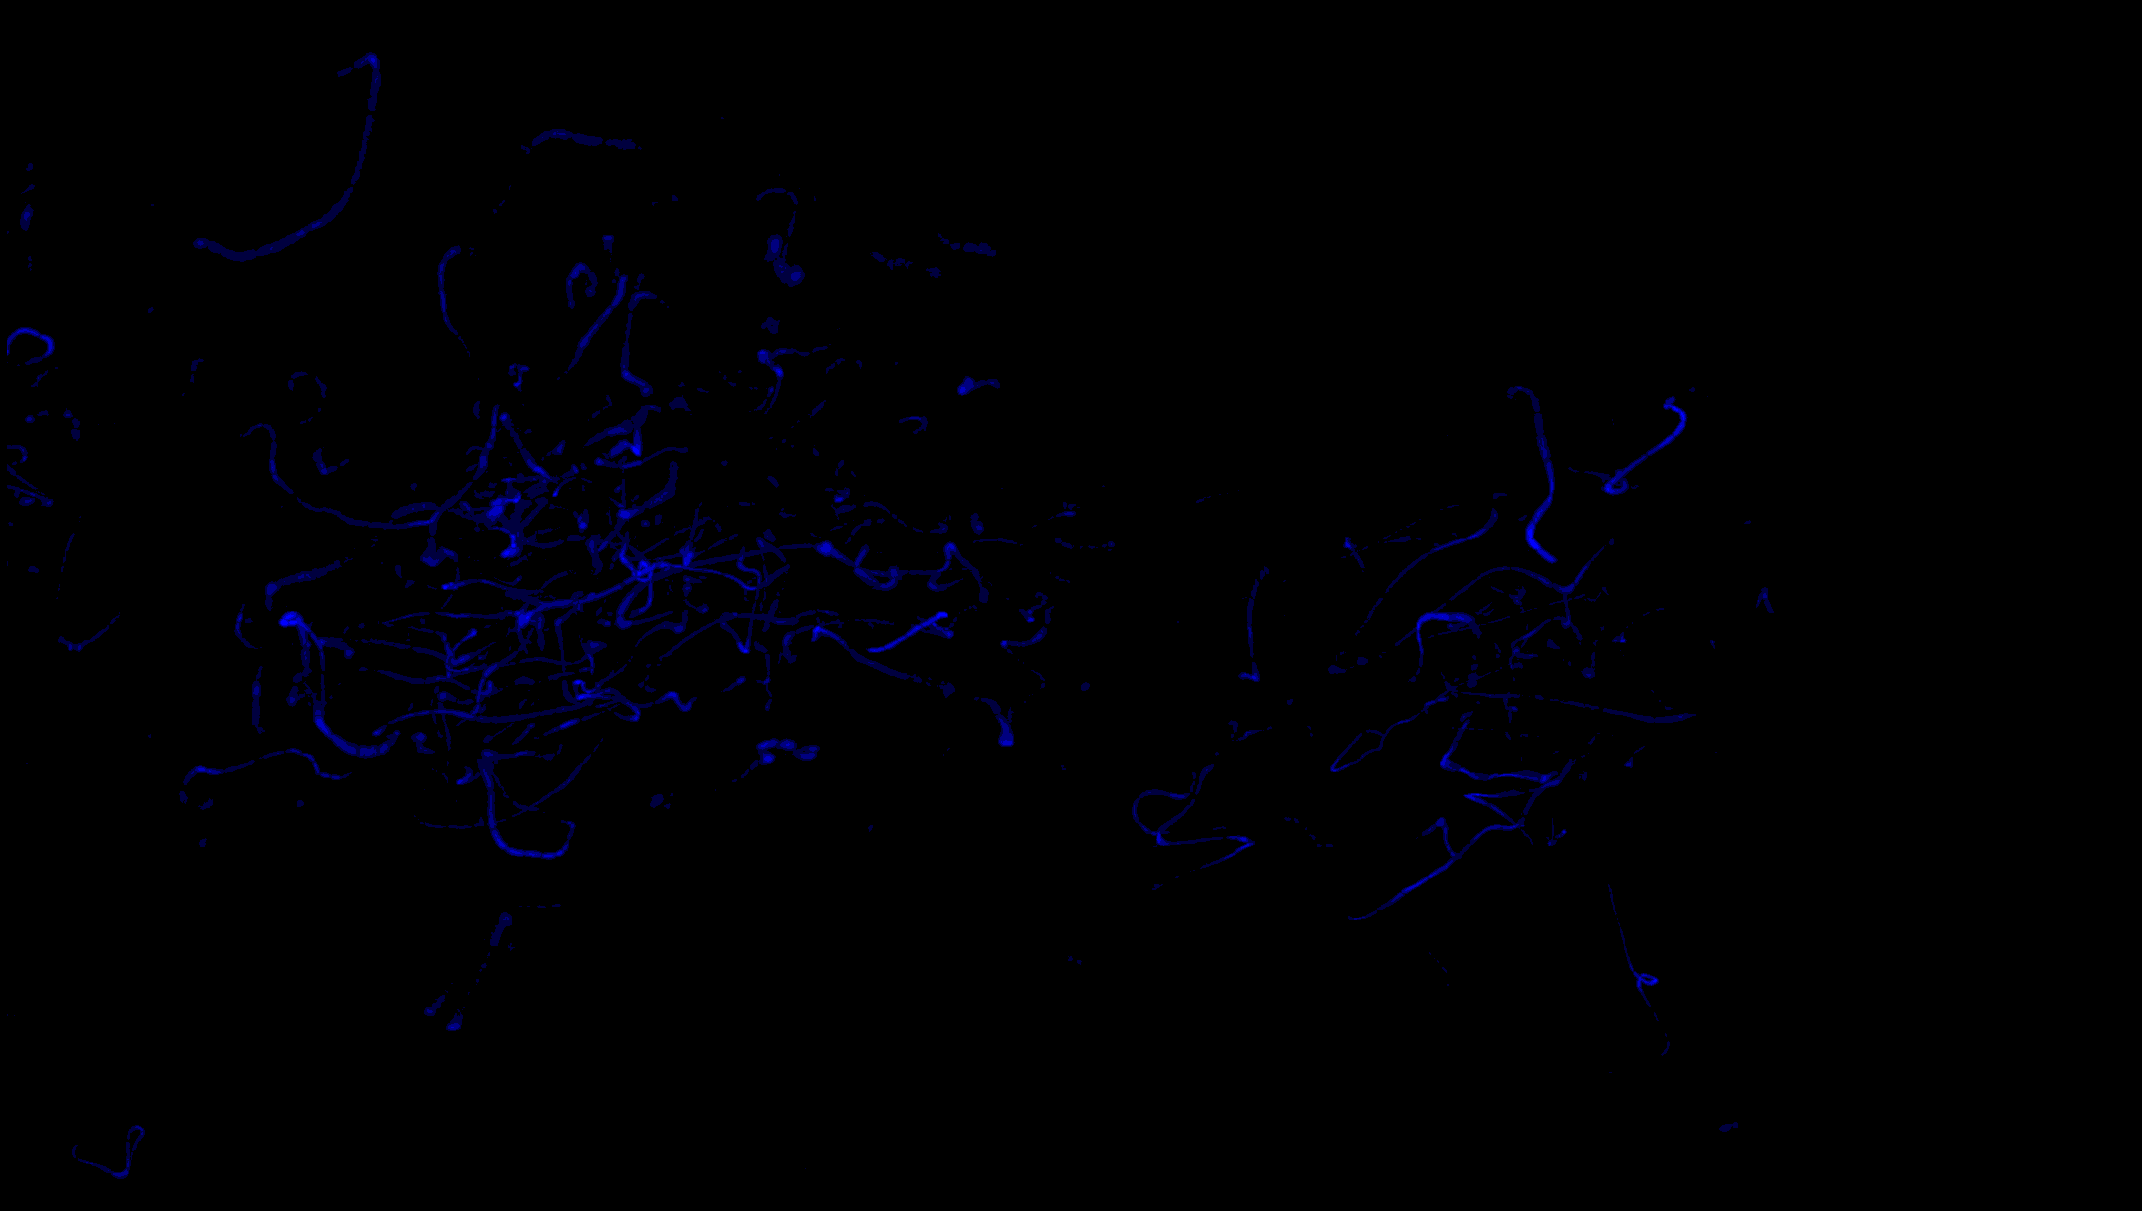

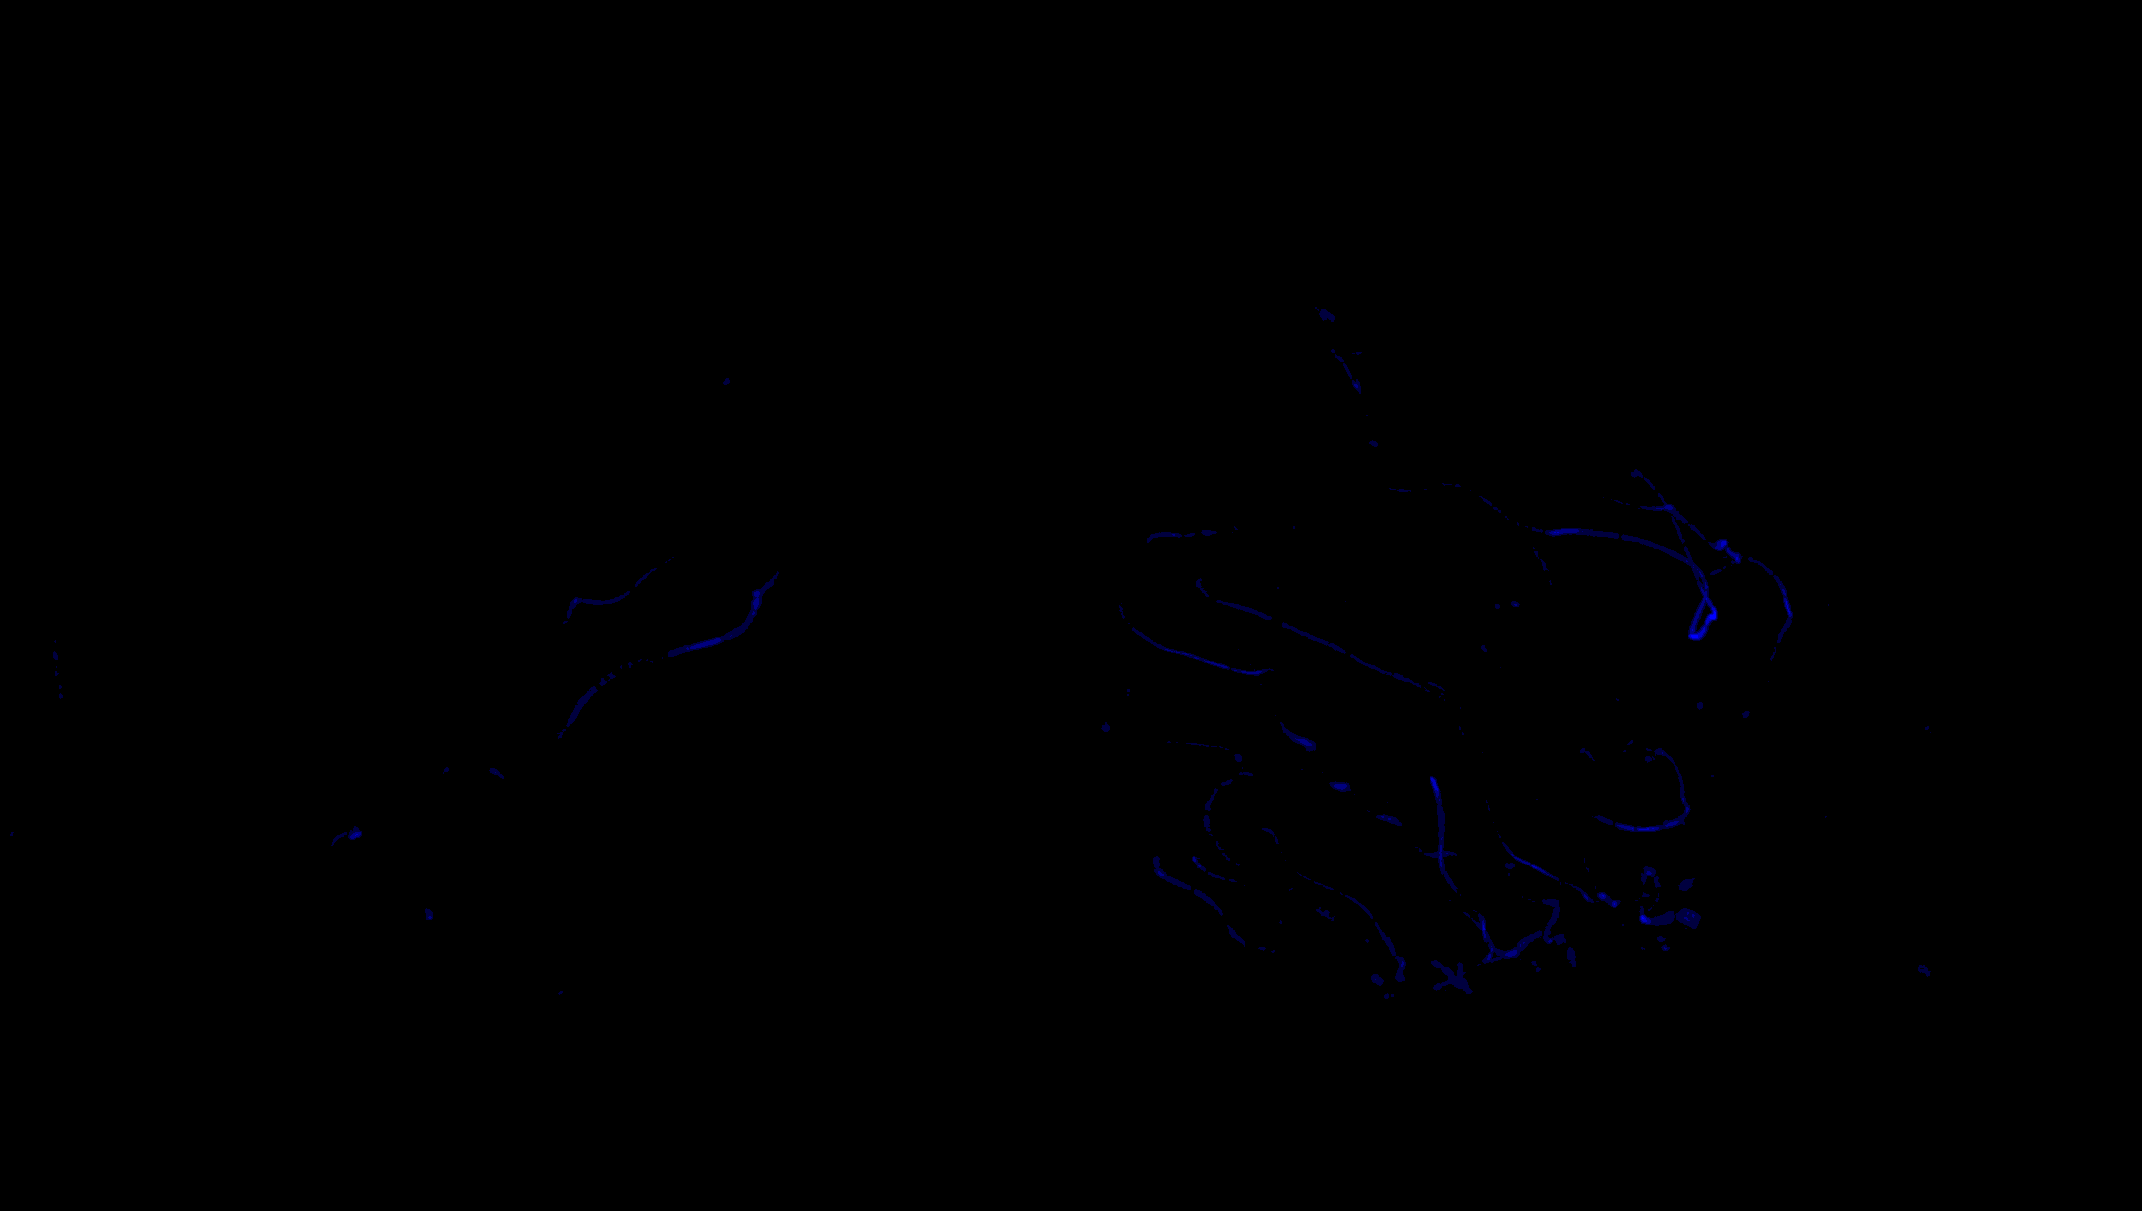

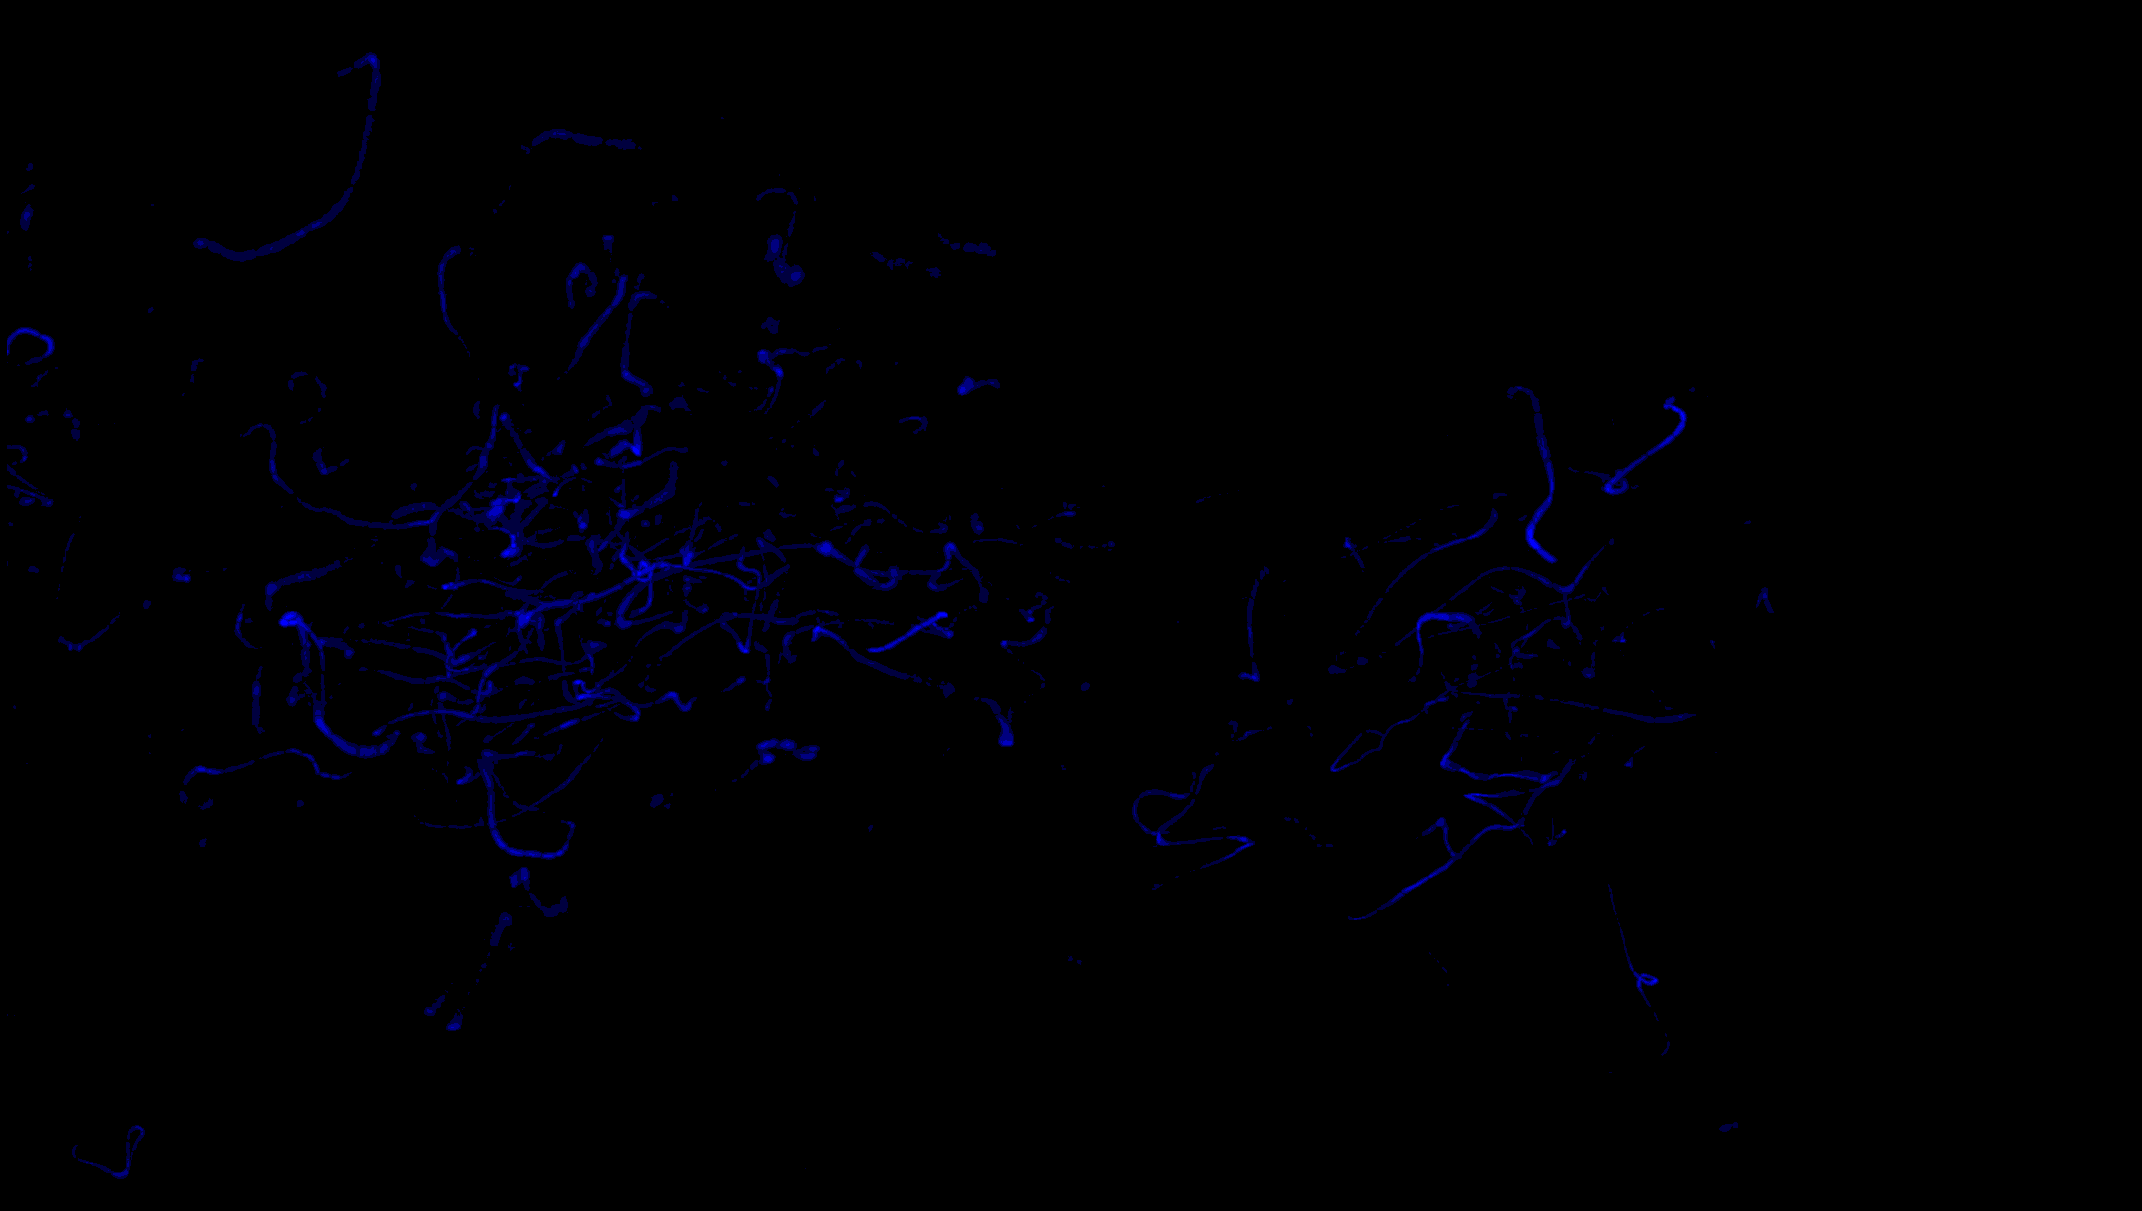

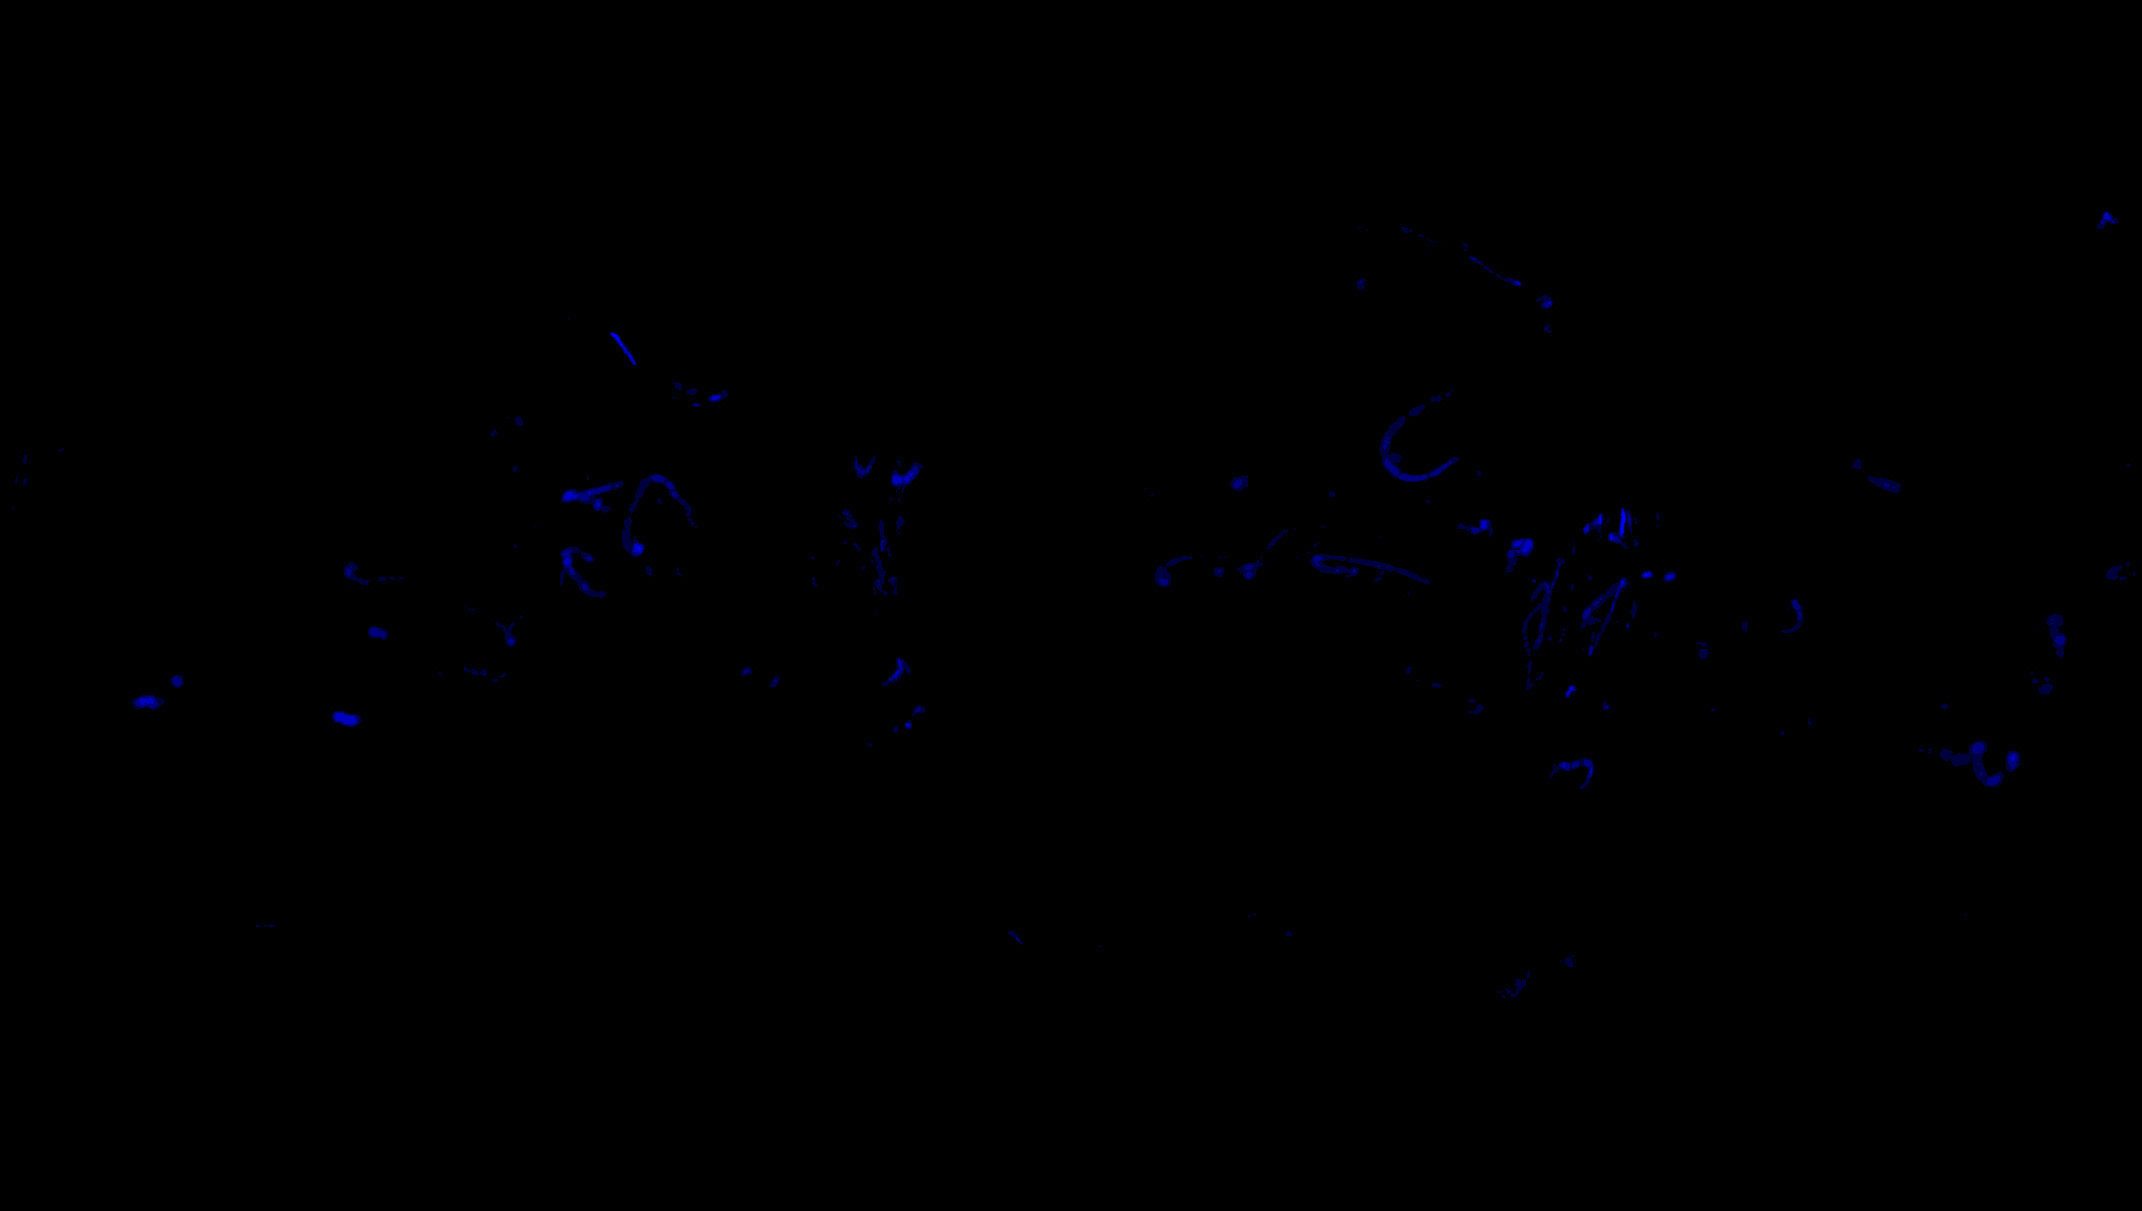

In [6]:
vid_dir = "./data/14092023/"
vid_filenames = [f.split(".mp4")[0] for f in os.listdir(vid_dir) if f.endswith(".mp4")]

colors = [(0, 0, 0), (0, 0, 1)]
cm = LinearSegmentedColormap.from_list("Custom", colors, N=5)

frame_extraction = True
if frame_extraction:
    for vid_file in vid_filenames:

        # Frame EXTRACTION
        video_path = os.path.join(vid_dir, vid_file + ".mp4")
        output_dir = os.path.join(vid_dir, vid_file)
        extract_frames(video_path, output_dir)

        # MAX PROJ
        filenames = [fn for fn in os.listdir(output_dir) if fn.endswith(".jpg")]
        filepaths = [os.path.join(output_dir, fp) for fp in filenames]
        result_img = maximum_intensity_projection(filepaths)

        plt.figure(figsize=(30,18))
        plt.imshow(result_img, cmap=cm)
        plt.axis("off")
        plt.tight_layout()
        plt.savefig(f"./max-int-proj-frames-all_{vid_file}.jpg", dpi=600)

In [ ]:
colors = [(0, 0, 0), (0, 0, 1)]
cm = LinearSegmentedColormap.from_list("Custom", colors, N=5)

plt.figure(figsize=(30,18))
plt.imshow(result_img, cmap=cm)
plt.axis("off")
plt.tight_layout()
plt.savefig(f"./max-int-proj-frames-all_{vid_file}.jpg", dpi=600)